# Concevez une application au service de la santé publique
## Exploration des données

# 1. Imports

In [23]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [24]:
data = pd.read_csv("data_cleaned.csv", sep='\t')
data.head()

Unnamed: 0  code                 product_name  \
0           0    17             Vitória crackers   
1           2   123        Sauce Sweety chili 0%   
2           3   178                    Mini coco   
3           7   949    Salade de carottes râpées   
4           8   970  Fromage blanc aux myrtilles   

                                          categories labels_tags  \
0                                                NaN         NaN   
1                                                NaN         NaN   
2                                                NaN         NaN   
3  Aliments et boissons à base de végétaux, Alime...         NaN   
4                                                NaN         NaN   

   nutriscore_score nutriscore_grade                      food_groups_tags  \
0               NaN                c                                   NaN   
1               NaN                c                                   NaN   
2               NaN                c                                   NaN   
3               1.0                b  en:composite-foods,en:one-dish-meals   
4               NaN                c                                   NaN   

   energy-kcal_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
0             375.0       7.0                3.08         15.0         NaN   
1              21.0       0.0                0.00          0.4         NaN   
2              60.0       3.0                1.00          3.0         NaN   
3              32.0       0.3                0.10          3.9         NaN   
4             129.0       4.9                3.10         16.3         NaN   

   proteins_100g  salt_100g  
0            7.8       1.40  
1            0.2       2.04  
2            2.0       1.15  
3            0.9       0.42  
4            4.4       0.25

In [25]:
data.drop(columns=['Unnamed: 0'], inplace=True)

In [26]:
data.shape

(712174, 14)

# 2. Analyse univariée

## 2.1 Qualitatives

[Text(0.5, 0, 'Features'), Text(0, 0.5, 'Nombre de valeurs')]

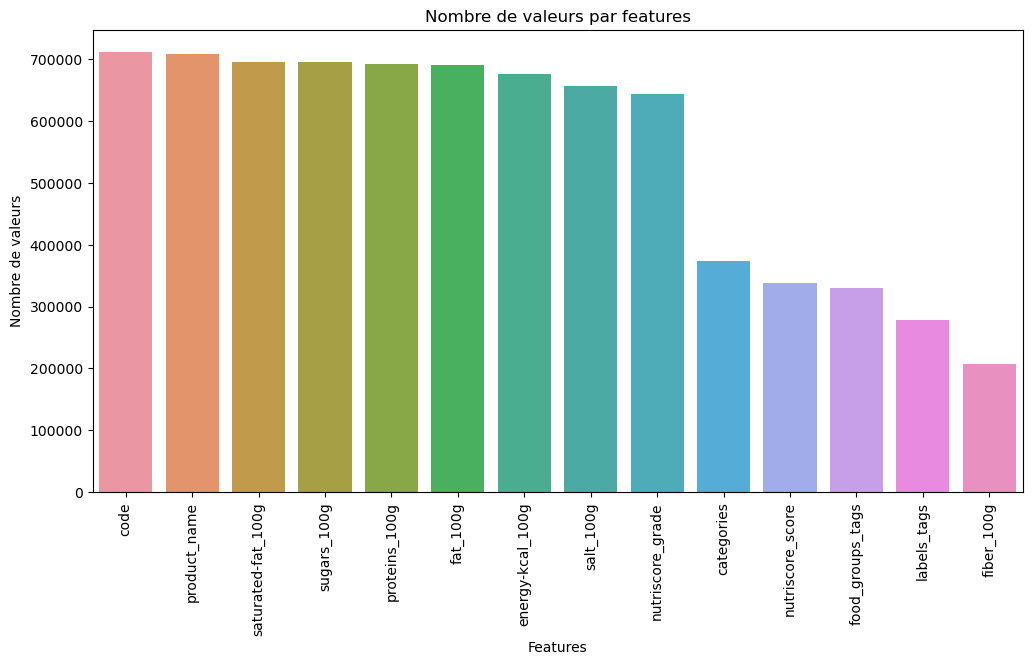

In [27]:
data_count = pd.DataFrame(data.notna().sum().sort_values(ascending=False), columns=['count']).reset_index()
plt.figure(figsize=(12,6))
plt.title('Nombre de valeurs par features')
plt.xticks(rotation= 90)
sns.barplot(data = data_count, x='index', y='count').set(xlabel='Features', ylabel='Nombre de valeurs')

### Catégories

In [28]:
data['categories'].mode()

0    Boissons
Name: categories, dtype: object

[Text(0.5, 0, 'Catégories'), Text(0, 0.5, 'Nombre de produits')]

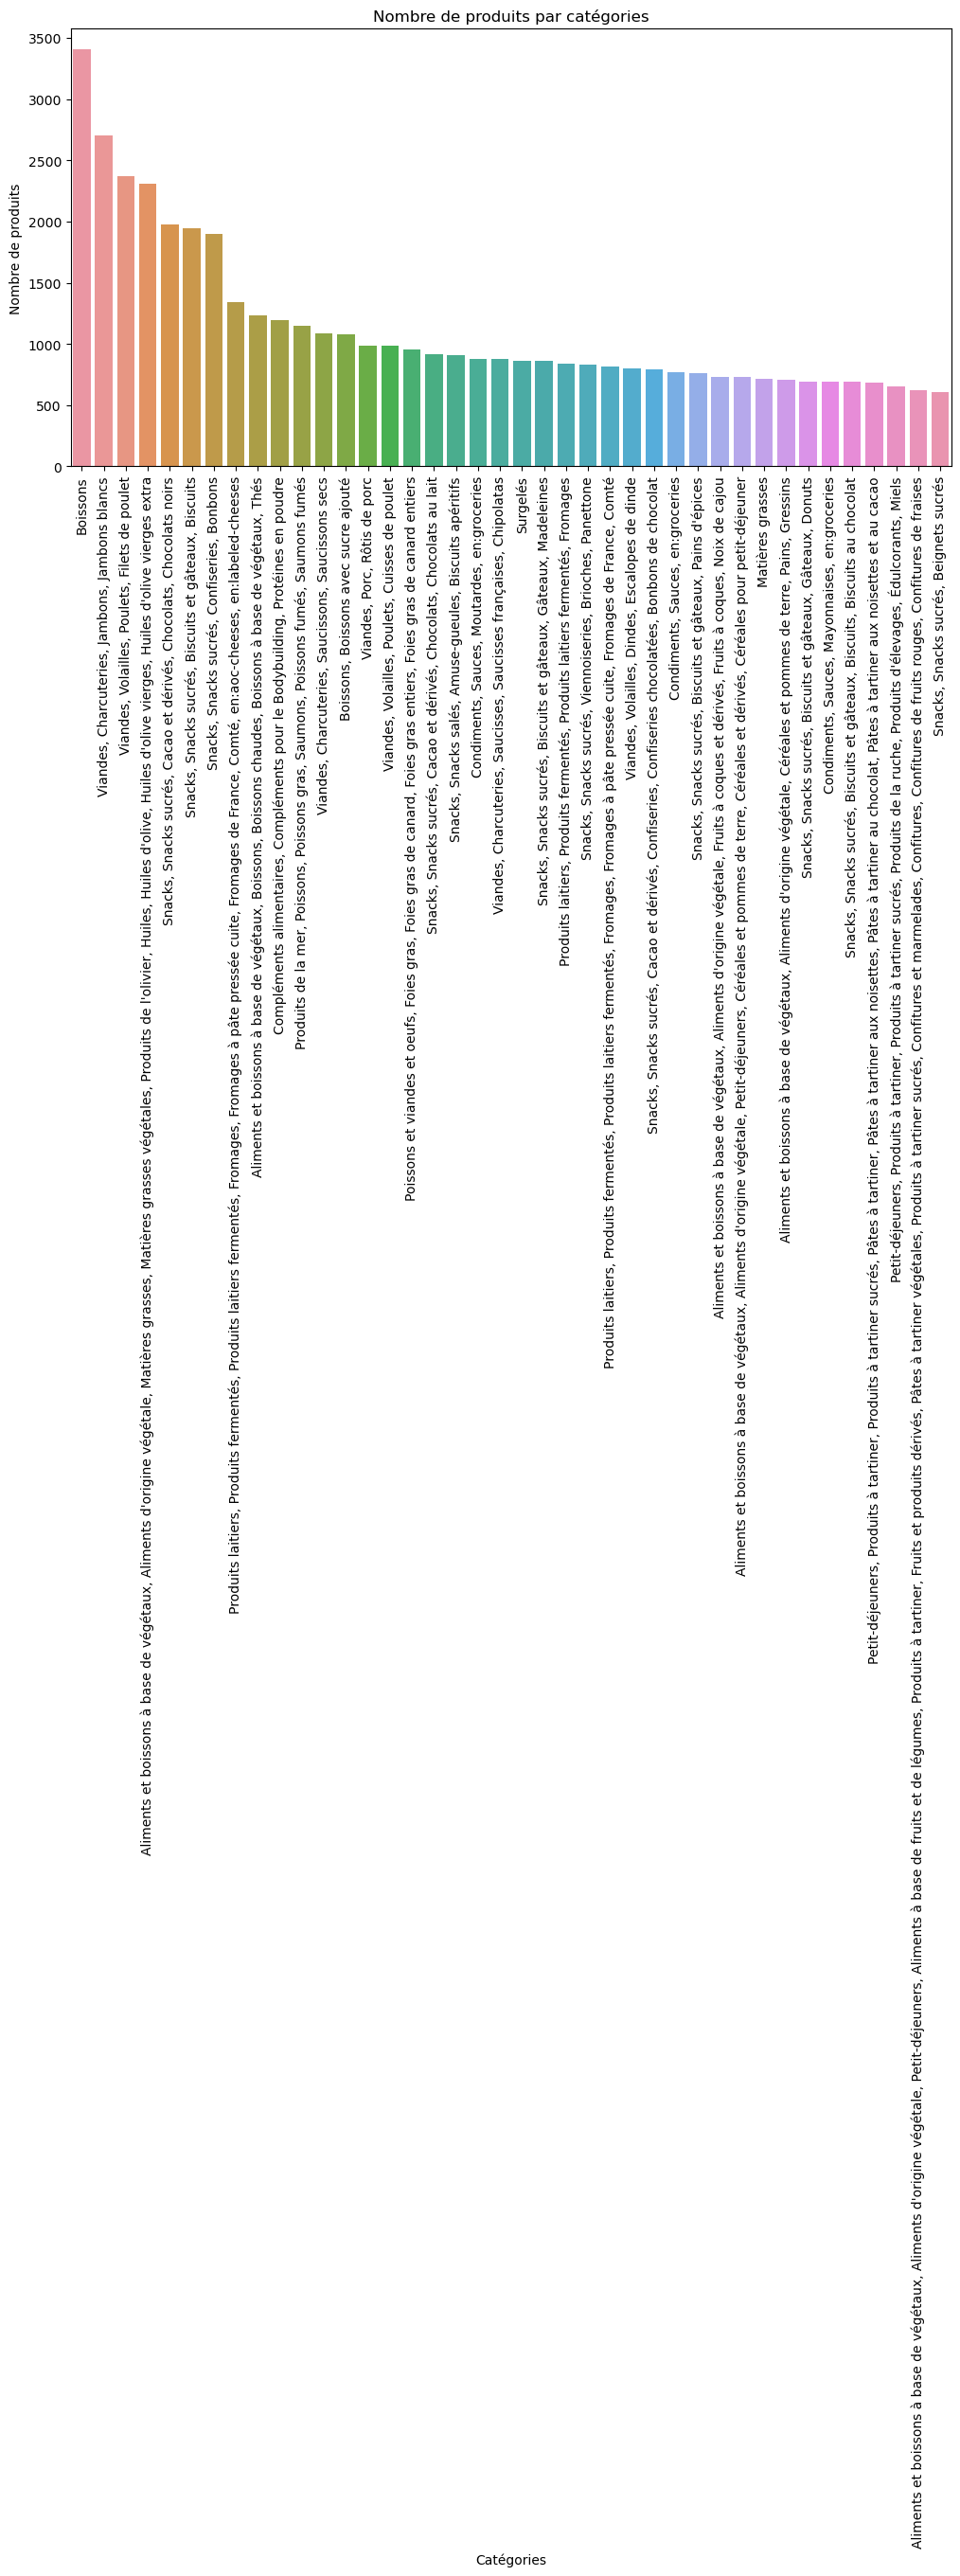

In [29]:
cat_count= pd.DataFrame(data['categories'].value_counts()).reset_index()
plt.figure(figsize=(12,6))
plt.title('Nombre de produits par catégories')
plt.xticks(rotation= 90)
sns.barplot(data = cat_count.head(40), x='index', y='categories').set(xlabel='Catégories', ylabel='Nombre de produits')

In [30]:
# Clustering des principales catégories par regex
vege = "Aliments et boissons à base de végétaux, Aliments d'origine végétale"
drink = "Boissons|Aliments et boissons à base de végétaux, Boissons"
meatfish = "Viandes|Poissons et viandes et oeufs|Produits de la mer"

categ_grouped = pd.DataFrame(index=['Végétaux','Produits laitiers','Poissons & Viandes','Boissons',
                                    'Compléments alimentaires','Snacks'], columns=['count'])

categ_grouped.loc['Végétaux'] = data['categories'].loc[data['categories'].str.contains(vege, regex=True, na=False)].count()
categ_grouped.loc['Produits laitiers'] = data['categories'].loc[data['categories'].str.contains('Produits laitiers', case=False, regex=True, na=False)].count()
categ_grouped.loc['Poissons & Viandes'] = data['categories'].loc[data['categories'].str.contains(meatfish, regex=True, na=False)].count()
categ_grouped.loc['Boissons'] = data['categories'].loc[data['categories'].str.contains(drink, regex=True, na=False)].count()
categ_grouped.loc['Compléments alimentaires'] = data['categories'].loc[data['categories'].str.contains('Compléments alimentaires', case=False, regex=True, na=False)].count()
categ_grouped.loc['Snacks'] = data['categories'].loc[data['categories'].str.contains('Snacks', case=False, regex=True, na=False)].count()
categ_grouped = categ_grouped.sort_values(by='count', ascending=False).reset_index()
categ_grouped

index  count
0                  Végétaux  81232
1                    Snacks  64878
2        Poissons & Viandes  61902
3         Produits laitiers  34607
4                  Boissons  32301
5  Compléments alimentaires   3200

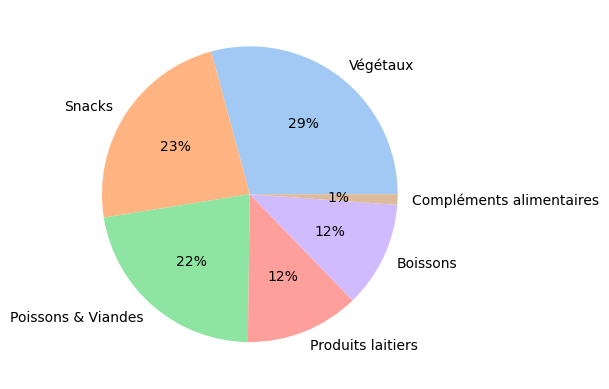

In [31]:
colors = sns.color_palette('pastel')

plt.pie(categ_grouped['count'],labels=categ_grouped['index'], colors = colors, autopct='%.0f%%')
plt.show()

[Text(0.5, 0, 'Groupe de catégories'), Text(0, 0.5, 'Nombre de produits')]

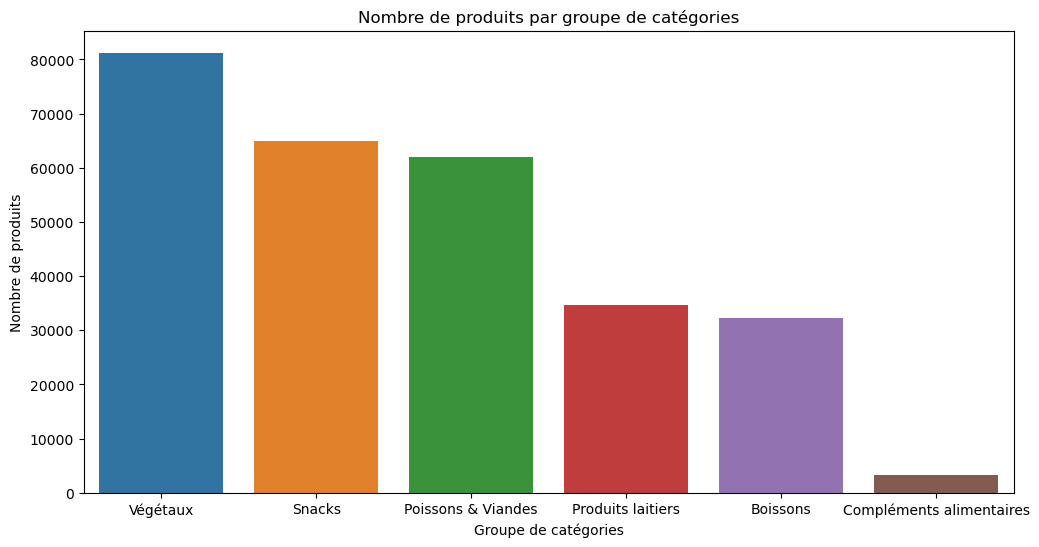

In [32]:
plt.figure(figsize=(12,6))
plt.title('Nombre de produits par groupe de catégories')
sns.barplot(data=categ_grouped, x='index', y='count').set(xlabel='Groupe de catégories', ylabel='Nombre de produits')

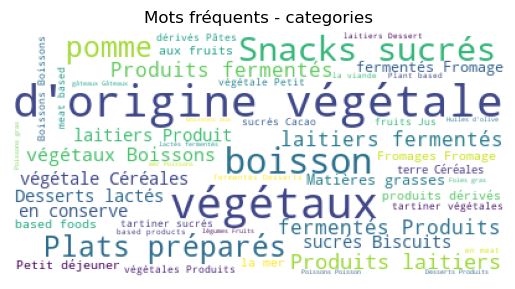

In [33]:
from wordcloud import WordCloud
from PIL import Image

exclure_mots = ['Aliments et boissons', 'aliments', 'et', 'à', 'base', 'de', 'en:', 'and']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(''.join(data['categories'].loc[data['categories'].notna()]))
plt.imshow(wordcloud)
plt.title('Mots fréquents - categories')
plt.axis("off")
plt.show();

### Labels

In [34]:
data['labels_tags'].mode()

0    en:organic
Name: labels_tags, dtype: object

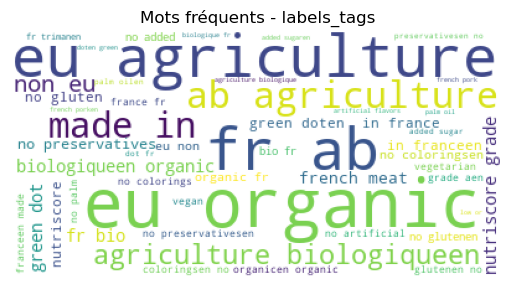

In [35]:
exclure_mots = ['en', 'and']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(''.join(data['labels_tags'].loc[data['labels_tags'].notna()]))
plt.imshow(wordcloud)
plt.title('Mots fréquents - labels_tags')
plt.axis("off")
plt.show();

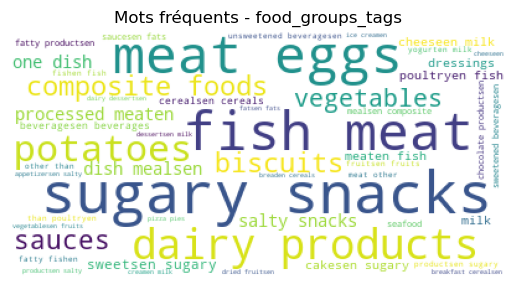

In [36]:
exclure_mots = ['en', 'and']
wordcloud = WordCloud(background_color = 'white', stopwords = exclure_mots, max_words = 50).generate(''.join(data['food_groups_tags'].loc[data['food_groups_tags'].notna()]))
plt.imshow(wordcloud)
plt.title('Mots fréquents - food_groups_tags')
plt.axis("off")
plt.show();

### Nutriscore

<AxesSubplot:xlabel='nutriscore_score', ylabel='Count'>

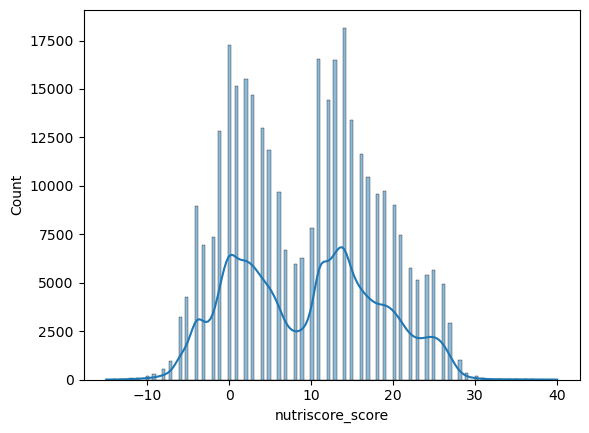

In [37]:
sns.histplot(data['nutriscore_score'], kde=True)

<AxesSubplot:xlabel='nutriscore_grade', ylabel='Count'>

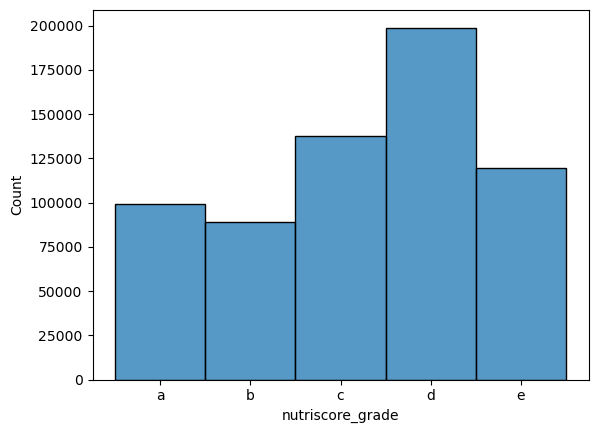

In [38]:
sns.histplot(data['nutriscore_grade'].sort_values())

## 2.2 Numériques

In [39]:
data.describe()

code  nutriscore_score  energy-kcal_100g       fat_100g  \
count  7.121740e+05     338130.000000     675825.000000  691441.000000   
mean   4.153395e+12          9.475941        276.553978      14.273580   
std    2.220778e+12          8.667986        196.644707      17.522037   
min    1.700000e+01        -15.000000          0.000000       0.000000   
25%    3.245270e+12          2.000000        113.000000       1.000000   
50%    3.564380e+12         10.000000        264.000000       8.010000   
75%    5.051278e+12         16.000000        400.000000      22.300000   
max    1.000000e+13         40.000000      15642.857143     100.000000   

       saturated-fat_100g    sugars_100g     fiber_100g  proteins_100g  \
count       696293.000000  695743.000000  206637.000000  693225.000000   
mean             5.413989      13.517999       3.161011       8.981362   
std              7.916339      19.930711       5.719202      10.021765   
min              0.000000       0.000000       0.000000       0.000000   
25%              0.200000       0.600000       0.100000       1.500000   
50%              2.000000       3.300000       1.600000       6.300000   
75%              8.000000      19.000000       3.700000      13.000000   
max            100.000000     100.000000     100.000000     100.000000   

           salt_100g  
count  657280.000000  
mean        1.271987  
std         4.195533  
min         0.000000  
25%         0.070000  
50%         0.550000  
75%         1.324078  
max       100.000000

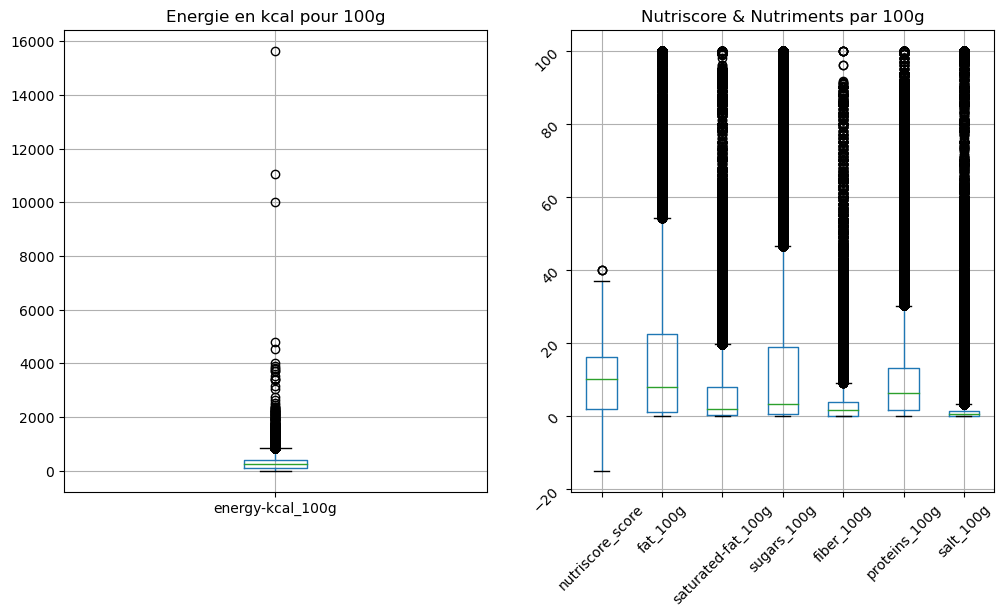

In [40]:
df1 = data[['energy-kcal_100g']]
df2 = data[['nutriscore_score','fat_100g','saturated-fat_100g', 'sugars_100g',
                     'fiber_100g','proteins_100g','salt_100g']]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))
df1.boxplot(ax=axs[0])
axs[0].set_title('Energie en kcal pour 100g')
df2.boxplot(ax=axs[1])
axs[1].set_title('Nutriscore & Nutriments par 100g')
axs[1].tick_params(labelrotation=45)

plt.show()

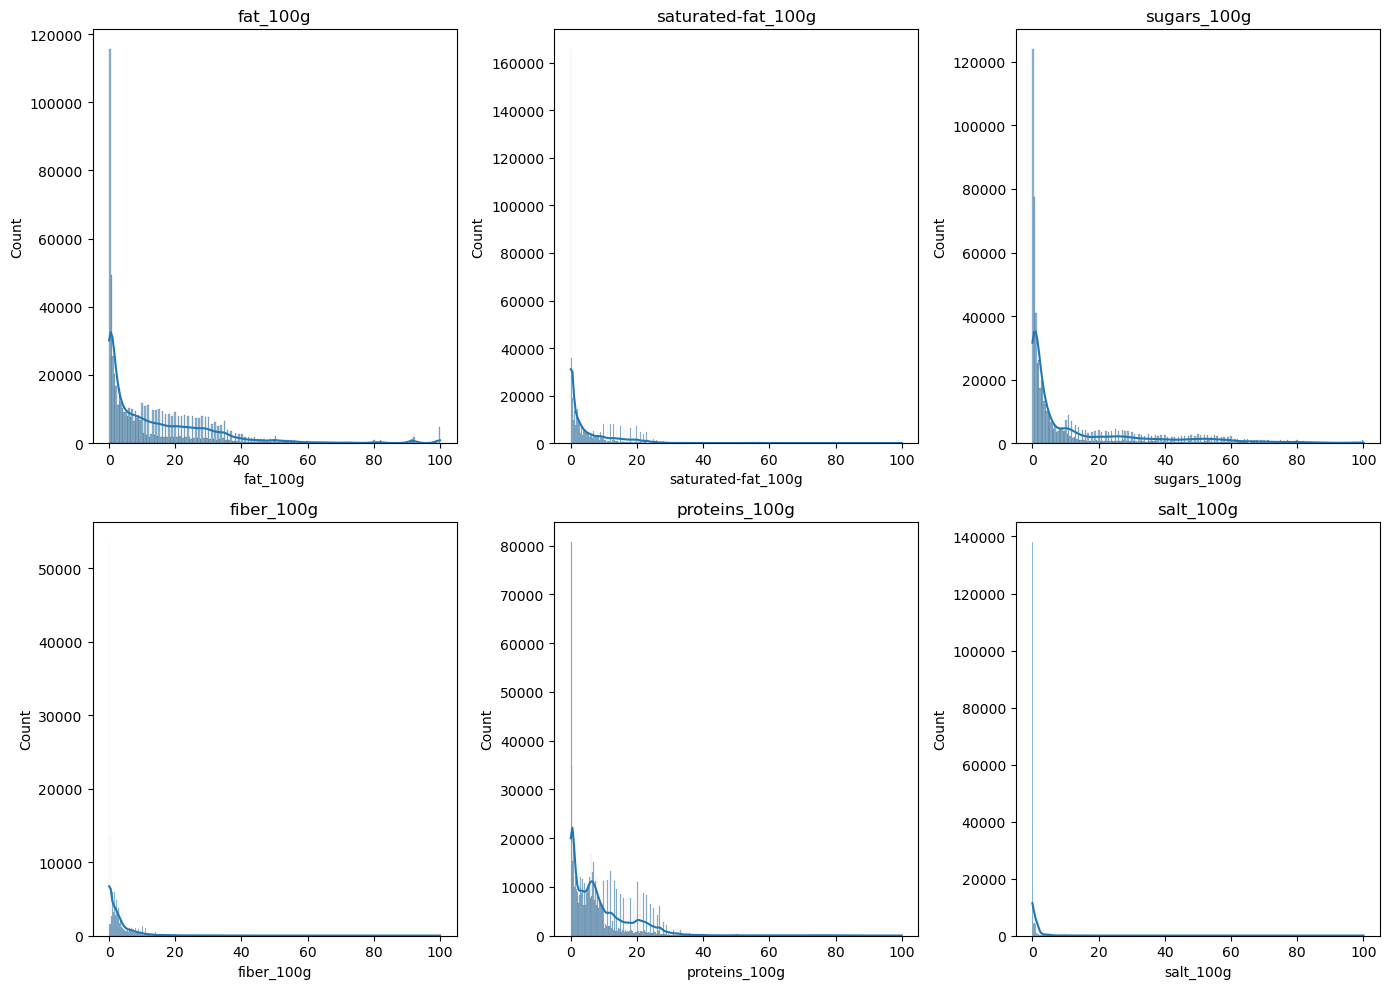

In [41]:
# Création des sous-graphiques
fig, axs = plt.subplots(2,3 , figsize=(14, 10))

for i, col in enumerate(data.iloc[:,8:].columns):
    # Calcul de l'indice du subplot correspondant
    r = i // 3
    c = i % 3
    
    # Affichage du histplot sur le subplot correspondant
    sns.histplot(data=data, x=col, ax=axs[r][c], kde=True)
    axs[r][c].set_title(f'{col}')
    
# Réglage des espacements entre les subplots
plt.tight_layout()

plt.show()

[(-30.0, 4000.0), (0.0, 15000.0)]

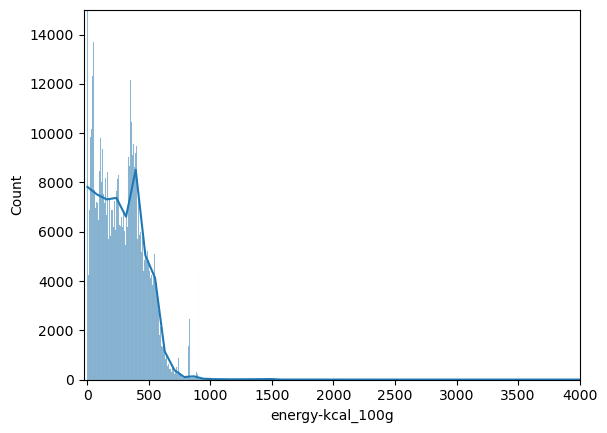

In [42]:
sns.histplot(data['energy-kcal_100g'], kde=True).set(xlim=(-30,4000), ylim=(0,15000))

# 3. Analyse bivariée 

Première analyse des différentes variables numériques, classées par nustriscore

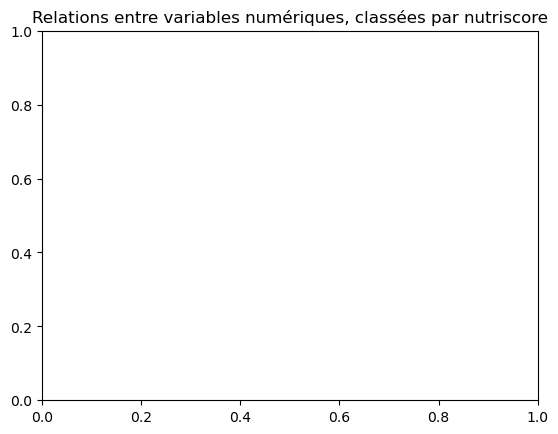

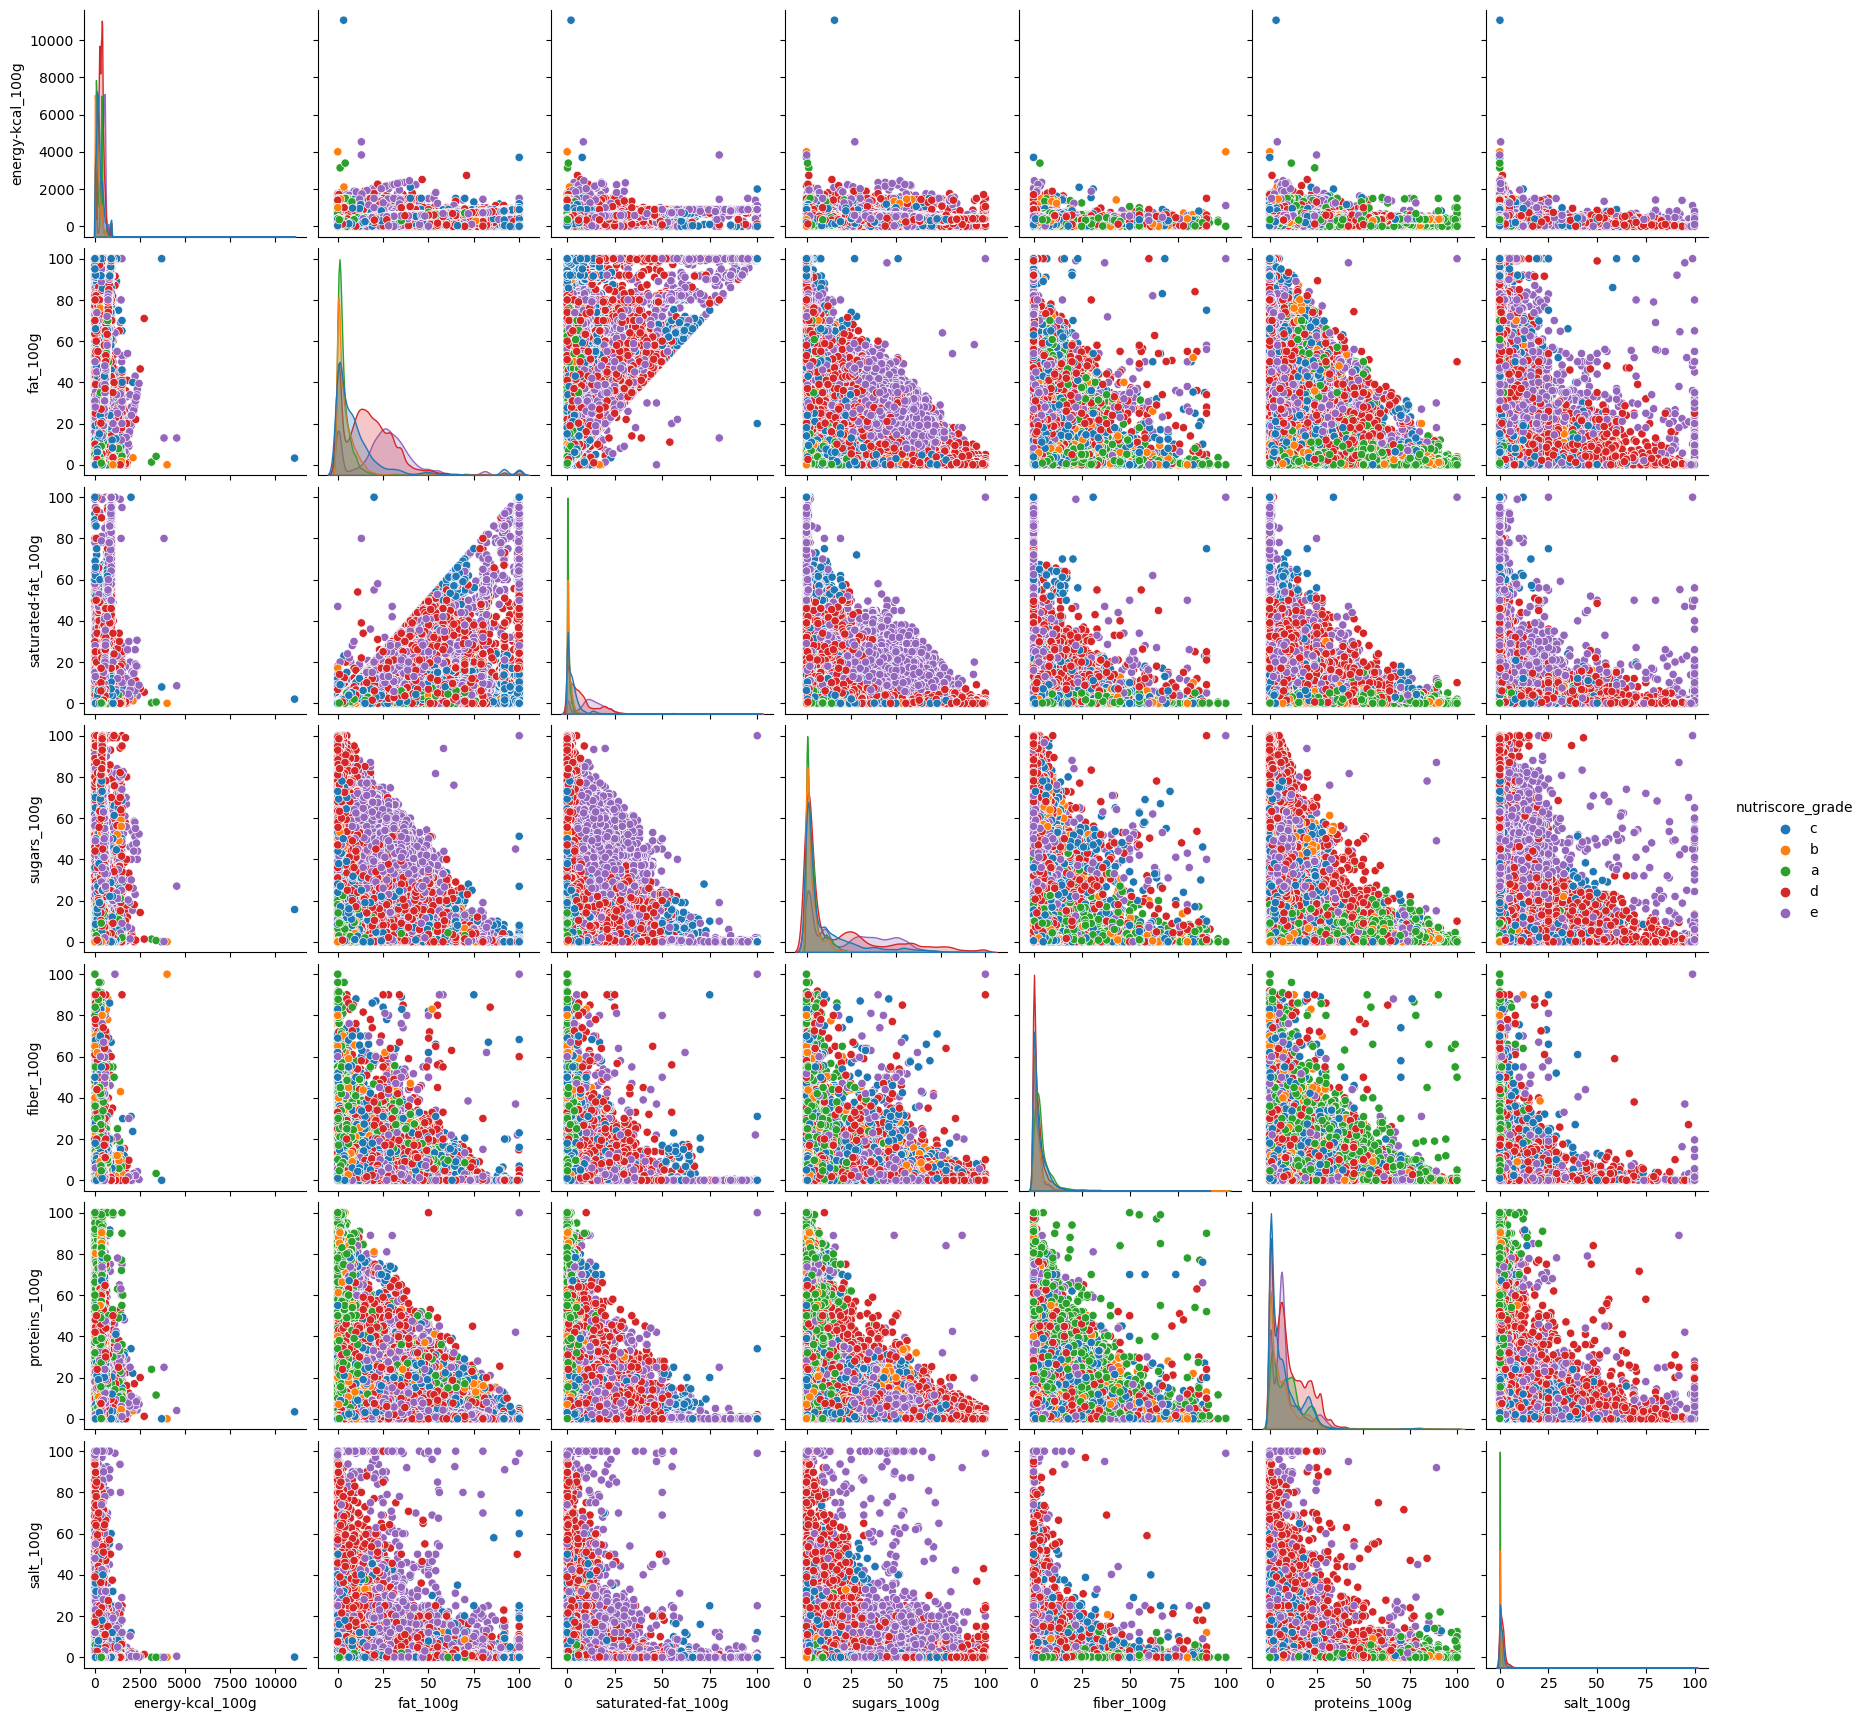

In [43]:
plt.title('Relations entre variables numériques, classées par nutriscore')
sns.pairplot(data.iloc[:,5:], hue='nutriscore_grade')

Matrice de corrélation entre les variables numériques

<AxesSubplot:title={'center':'Matrice de corrélation des variables numériques'}>

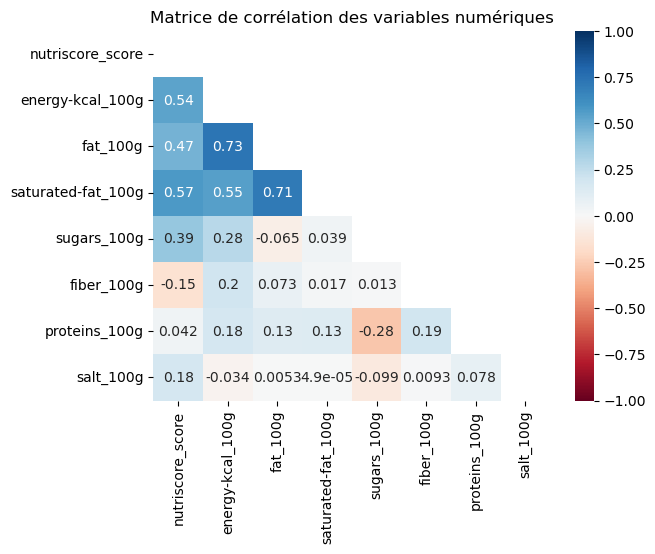

In [44]:
plt.title('Matrice de corrélation des variables numériques')
mask=np.triu(data.iloc[:,1:].corr())
sns.heatmap(data.iloc[:,1:].corr(), annot=data.iloc[:,1:].corr(), mask=mask, cmap='RdBu', vmin=-1, vmax=1)

## 3.1 Nutriments vs Nutriscore (ANOVA)

<AxesSubplot:title={'center':'energy-kcal_100g vs Nutriscore'}, xlabel='energy-kcal_100g', ylabel='nutriscore_grade'>

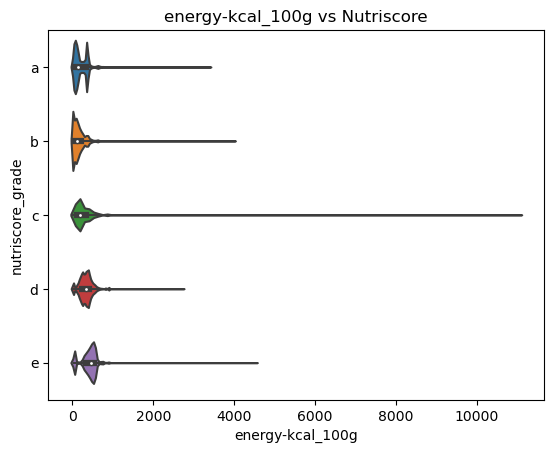

In [93]:
energy = data.iloc[:,7]
plt.title('energy-kcal_100g vs Nutriscore')
sns.violinplot(data=data.sort_values(by="nutriscore_grade"), x=energy, y="nutriscore_grade")

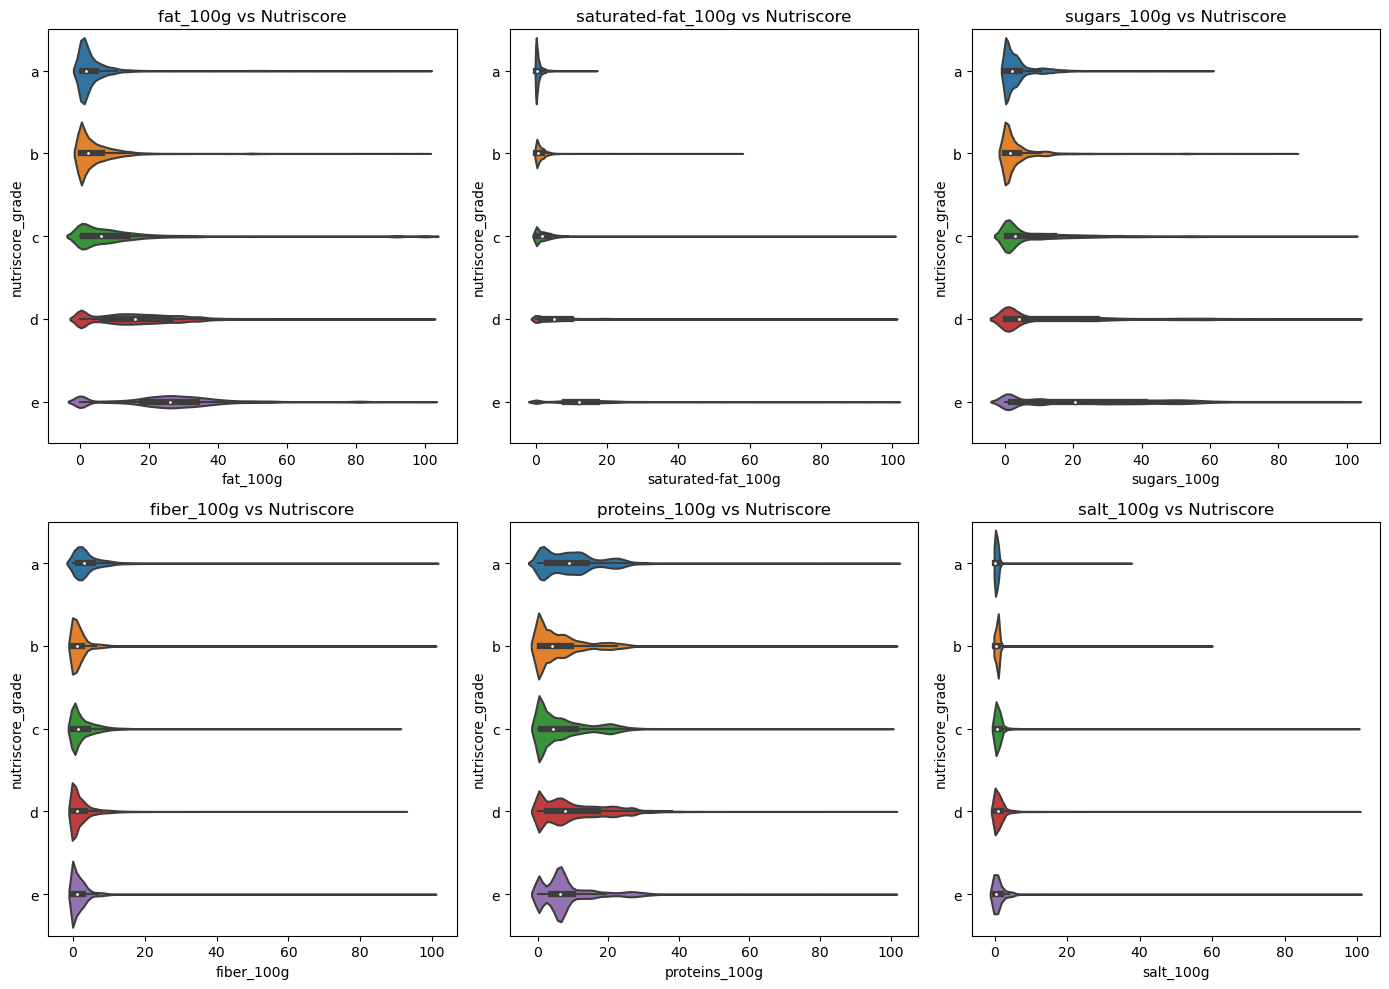

In [46]:
nutriments = data.iloc[:,8:]
nutriments['nutriscore_grade'] = data['nutriscore_grade']

fig, axs = plt.subplots(2,3 , figsize=(14, 10))

for i, col in enumerate(nutriments.iloc[:,:-1].columns):
    # Calcul de l'indice du subplot correspondant
    r = i // 3
    c = i % 3
    
    # Affichage du violinplot sur le subplot correspondant
    sns.violinplot(data=data.sort_values(by="nutriscore_grade"), x=col, y="nutriscore_grade", ax=axs[r][c])
    axs[r][c].set_title(f'{col} vs Nutriscore')
    
plt.tight_layout()

plt.show()

<AxesSubplot:xlabel='energy-kcal_100g', ylabel='nutriscore_grade'>

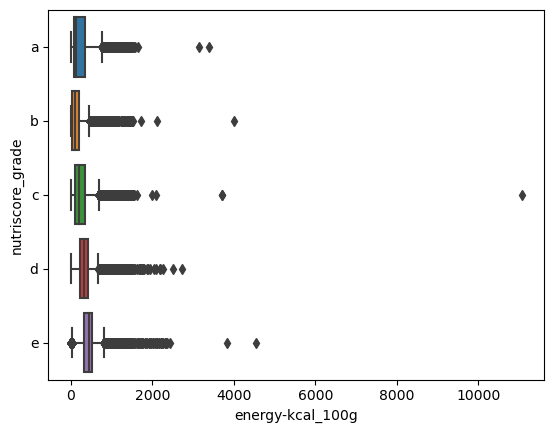

In [95]:
sns.boxplot(data=data.sort_values(by="nutriscore_grade"), x=energy, y="nutriscore_grade")

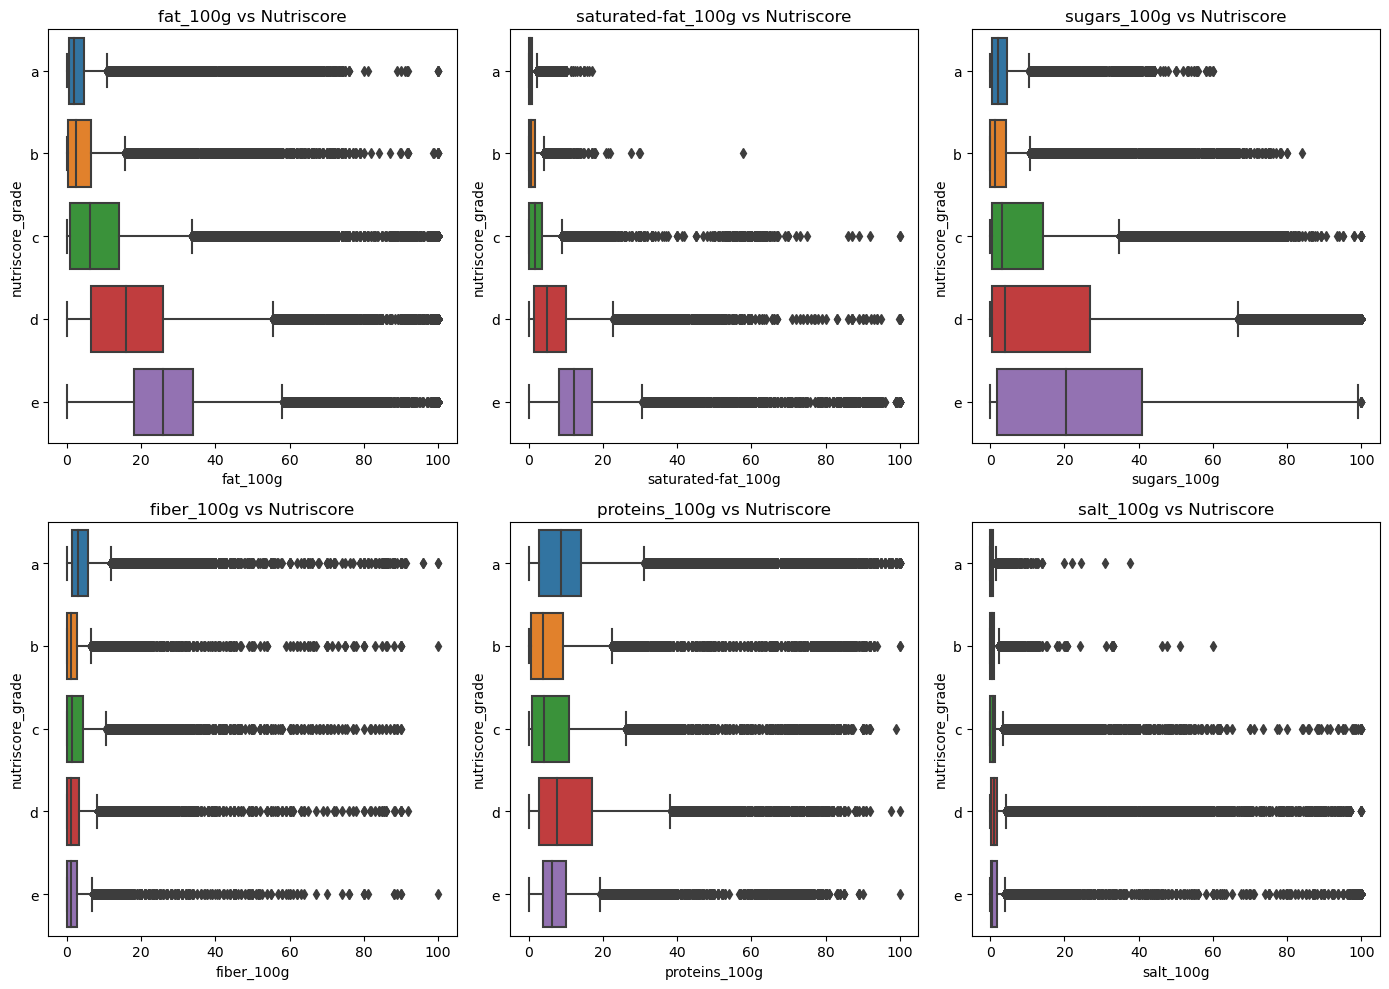

In [48]:
fig, axs = plt.subplots(2,3 , figsize=(14, 10))

for i, col in enumerate(nutriments.iloc[:,:-1].columns):
    # Calcul de l'indice du subplot correspondant
    r = i // 3
    c = i % 3
    
    # Affichage du violinplot sur le subplot correspondant
    sns.boxplot(data=data.sort_values(by="nutriscore_grade"), x=col, y="nutriscore_grade", ax=axs[r][c])
    axs[r][c].set_title(f'{col} vs Nutriscore')
    
plt.tight_layout()

plt.show()

In [100]:
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

print(f'Rapport de corrélation Nutriscore vs :')
for i, col in enumerate(nutriments.iloc[:,:-1].columns):
    print(f'{col} : ', round(eta_squared(nutriments["nutriscore_grade"].loc[nutriments[col].notna() & nutriments['nutriscore_grade'].notna()], nutriments[col].loc[nutriments[col].notna() & nutriments['nutriscore_grade'].notna()]), 2))

Rapport de corrélation Nutriscore vs :
fat_100g :  0.19
saturated-fat_100g :  0.31
sugars_100g :  0.14
fiber_100g :  0.03
proteins_100g :  0.03
salt_100g :  0.02


In [101]:
print(f'Rapport de corrélation Nutriscore vs energy :')
round(eta_squared(nutriments['nutriscore_grade'].loc[energy.notna() & nutriments['nutriscore_grade'].notna()], energy.loc[nutriments['nutriscore_grade'].notna() & energy.notna()]),2)

Rapport de corrélation Nutriscore vs energy :


0.21

### 3.2 Catégorie vs Nutriscore (Chi-2)

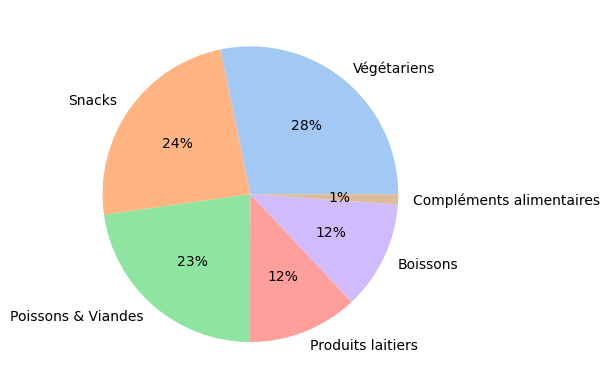

In [51]:
vege = "Aliments et boissons à base de végétaux, Aliments d'origine végétale"
drink = "Boissons|Aliments et boissons à base de végétaux, Boissons"
meatfish = "Viandes|Poissons et viandes et oeufs|Produits de la mer"

data.loc[data['categories'].str.contains(vege, regex=True, na=False), 'classe'] = 'Végétariens'
data.loc[data['categories'].str.contains('Produits laitiers', case=False, regex=True, na=False),'classe'] = 'Produits laitiers'
data.loc[data['categories'].str.contains(meatfish, regex=True, na=False),'classe'] = 'Poissons & Viandes'
data.loc[data['categories'].str.contains(drink, regex=True, na=False),'classe'] = 'Boissons'
data.loc[data['categories'].str.contains('Compléments alimentaires', case=False, regex=True, na=False),'classe'] = 'Compléments alimentaires'
data.loc[data['categories'].str.contains('Snacks', case=False, regex=True, na=False),'classe'] = 'Snacks'

colors = sns.color_palette('pastel')

class_count = pd.DataFrame(data['classe'].value_counts())
plt.pie(class_count['classe'], labels=class_count.index, colors = colors, autopct='%.0f%%')
plt.show()

Répartition équilibrée entre végé, snacks et poissons viandes

In [52]:
X = "nutriscore_grade"
Y = "classe"

cont = data[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len,margins=True,margins_name="Total")
cont

classe            Boissons  Compléments alimentaires  Poissons & Viandes  \
nutriscore_grade                                                           
a                     1473                       479                7068   
b                     5911                       665                7478   
c                     5804                       610               11147   
d                     5366                       785               20179   
e                     9370                        80               13687   
Total                27924                      2619               59559   

classe            Produits laitiers  Snacks  Végétariens   Total  
nutriscore_grade                                                  
a                              2171     917        23366   35474  
b                              4159    1979        12095   32287  
c                              6412    7215        20353   51541  
d                             16178   24933        13108   80549  
e                              2615   27639         1731   55122  
Total                         31535   62683        70653  254973

In [53]:
from scipy.stats import chi2_contingency

# Test du chi-2
chi2, p, dof, expected = chi2_contingency(cont.iloc[:-1,:-1])

print("Chi-2:", chi2)
print("p-value:", p)
print("Degrés de liberté:", dof)
print("Tableau attendu:", pd.DataFrame(expected))

Chi-2: 83004.72766530629
p-value: 0.0
Degrés de liberté: 20
Tableau attendu:              0           1             2            3             4  \
0  3885.023026  364.377428   8286.351755  4387.415883   8720.989054   
1  3535.990823  331.641597   7541.902213  3993.248481   7937.491503   
2  5644.640350  529.412444  12039.433269  6374.578622  12670.927914   
3  8821.523361  827.373216  18815.395712  9962.281163  19802.304428   
4  6036.822440  566.195315  12875.917050  6817.475850  13551.287101   

              5  
0   9829.842854  
1   8946.725383  
2  14282.007401  
3  22320.122119  
4  15274.302244  


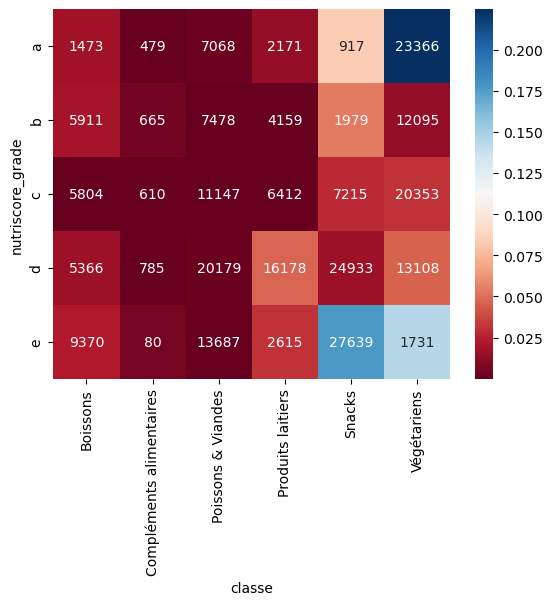

In [54]:
tx = cont.loc[:,["Total"]]
ty = cont.loc[["Total"],:]
n = len(data)
indep = tx.dot(ty) / cont.iloc[-1,-1]

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
xi_n = measure.sum().sum()
table = measure/xi_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1], cmap='RdBu', fmt=".0f")
plt.show()

Forte corrélation polarisée entre Végétarien et nutriscore : A pour produits alimentaires, E pour huile ?  
Chi-2 beaucoup trop grand pour confirmer une hypothèse d'indépendance.

### 3.3 Végétarien vs Nutriscore ?

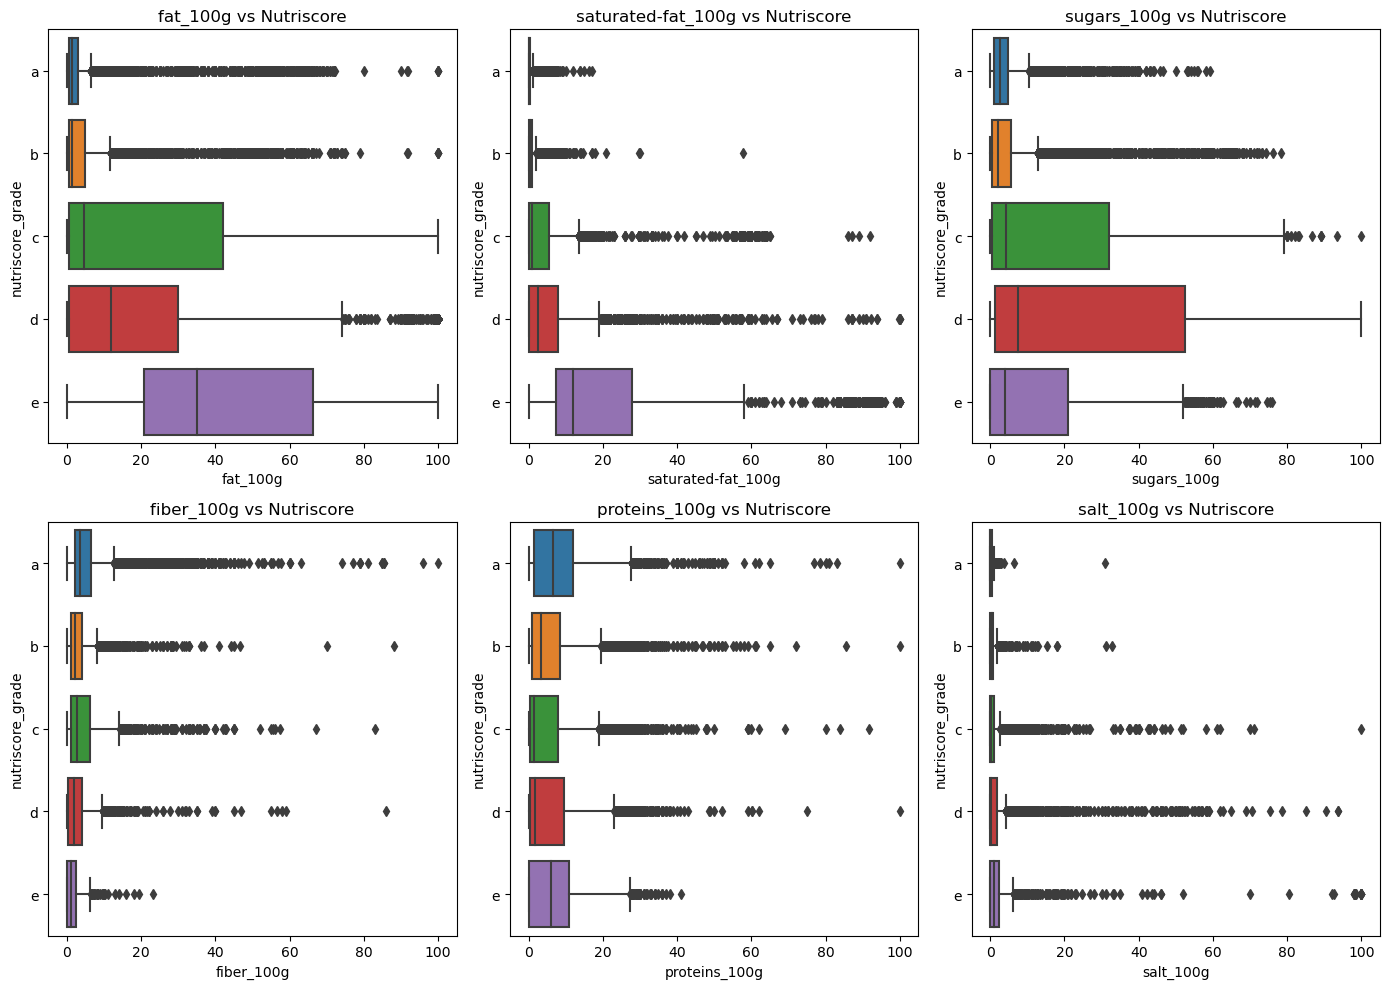

In [55]:
data_vege = data.loc[data['classe'] == "Végétariens"]

fig, axs = plt.subplots(2,3 , figsize=(14, 10))

for i, col in enumerate(data_vege.iloc[:,8:-1].columns):
    # Calcul de l'indice du subplot correspondant
    r = i // 3
    c = i % 3
    
    # Affichage du boxplot sur le subplot correspondant
    sns.boxplot(data=data_vege.sort_values(by="nutriscore_grade"), x=col, y="nutriscore_grade", ax=axs[r][c])
    axs[r][c].set_title(f'{col} vs Nutriscore')
    
plt.tight_layout()

plt.show()

In [56]:
print(f'Rapport de corrélation Nutriscore vs :')
for i, col in enumerate(data_vege.iloc[:,8:-1].columns):
    print(f'{col} : ', eta_squared(data_vege["nutriscore_grade"].loc[data_vege[col].notna() & data_vege['nutriscore_grade'].notna()], data_vege[col].loc[data_vege[col].notna() & data_vege['nutriscore_grade'].notna()]))

Rapport de corrélation Nutriscore vs :
fat_100g :  0.15734660405509365
saturated-fat_100g :  0.2714600665256773
sugars_100g :  0.16390390195436066
fiber_100g :  0.03468407725773364
proteins_100g :  0.02531486877645303
salt_100g :  0.04171854066591899


In [57]:
print('energy-kcal_100g : ', eta_squared(data_vege["nutriscore_grade"].loc[data_vege['energy-kcal_100g'].notna() & data_vege['nutriscore_grade'].notna()], data_vege['energy-kcal_100g'].loc[data_vege['energy-kcal_100g'].notna() & data_vege['nutriscore_grade'].notna()]))

energy-kcal_100g :  0.18043441903668184


Pas de grosses variations visibles par rapport à la généralité

# 4. Analyse Multivariée

## 4.1 ACP (sur classe végé)

In [58]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from matplotlib.collections import LineCollection

In [59]:
df_acp = data.loc[data['classe'] == 'Végétariens', :]
df_acp = df_acp.iloc[:,7:-2]
df_acp = df_acp.fillna(df_acp.mean())
X = df_acp.values

names = data.loc[data['classe'] == 'Végétariens', 'product_name']
features = df_acp.columns

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.16374110e+00, -5.41937523e-01, -3.55906428e-01,
        -4.37142322e-01, -2.09568020e-15, -7.40121946e-01],
       [-6.19240858e-01, -5.53086722e-01, -3.67526257e-01,
         8.09914787e-01, -2.16755912e-01, -7.81896826e-01],
       [-4.45000779e-01, -3.67266741e-01, -2.39708144e-01,
        -4.85728963e-01, -2.09568020e-15,  3.04250065e-01],
       [-6.06172852e-01, -4.71325930e-01, -3.09427114e-01,
        -6.15293337e-01, -7.41095055e-01,  4.57424627e-01],
       [-3.70948746e-01, -3.89565138e-01, -2.97807286e-01,
        -4.85728963e-01, -2.09568020e-15, -3.50223062e-01]])

In [60]:
scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)
X_scaled[:5]

array([[-1.16374110e+00, -5.41937523e-01, -3.55906428e-01,
        -4.37142322e-01, -2.09568020e-15, -7.40121946e-01],
       [-6.19240858e-01, -5.53086722e-01, -3.67526257e-01,
         8.09914787e-01, -2.16755912e-01, -7.81896826e-01],
       [-4.45000779e-01, -3.67266741e-01, -2.39708144e-01,
        -4.85728963e-01, -2.09568020e-15,  3.04250065e-01],
       [-6.06172852e-01, -4.71325930e-01, -3.09427114e-01,
        -6.15293337e-01, -7.41095055e-01,  4.57424627e-01],
       [-3.70948746e-01, -3.89565138e-01, -2.97807286e-01,
        -4.85728963e-01, -2.09568020e-15, -3.50223062e-01]])

In [61]:
idx = ["mean", "std"]

pd.DataFrame(X_scaled).describe().round(2).loc[idx, :]

0    1    2    3    4    5
mean  0.0 -0.0 -0.0  0.0 -0.0  0.0
std   1.0  1.0  1.0  1.0  1.0  1.0

In [62]:
pca=PCA(n_components=6)

pca.fit(X_scaled)

scree = (pca.explained_variance_ratio_*100).round(2)
scree_cum = scree.cumsum().round()
x_list = range(1, 7)
list(x_list)

[1, 2, 3, 4, 5, 6]

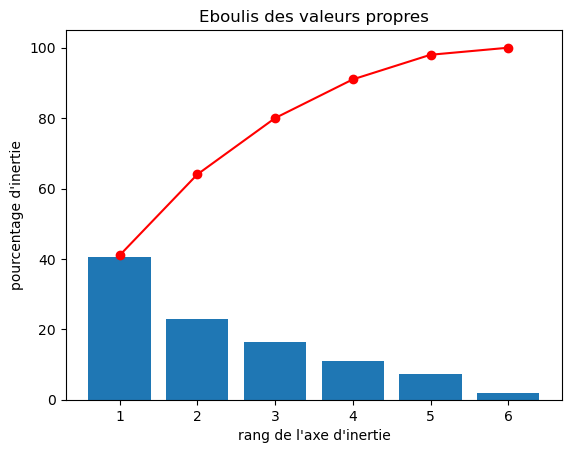

In [63]:
plt.bar(x_list, scree)
plt.plot(x_list, scree_cum,c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)

In [64]:
pcs = pd.DataFrame(pca.components_)
pcs.columns = features
pcs.index = [f"F{i}" for i in x_list]
pcs.round(2)

energy-kcal_100g  fat_100g  saturated-fat_100g  sugars_100g  fiber_100g  \
F1              0.57      0.59                0.48        -0.22        0.10   
F2             -0.02     -0.18               -0.27        -0.24        0.61   
F3              0.22      0.02                0.05         0.86        0.46   
F4             -0.32     -0.01                0.34        -0.32        0.62   
F5             -0.31     -0.37                0.76         0.15       -0.15   
F6              0.66     -0.70                0.08        -0.18        0.01   

    proteins_100g  
F1           0.20  
F2           0.68  
F3          -0.07  
F4          -0.55  
F5           0.39  
F6          -0.21

<AxesSubplot:>

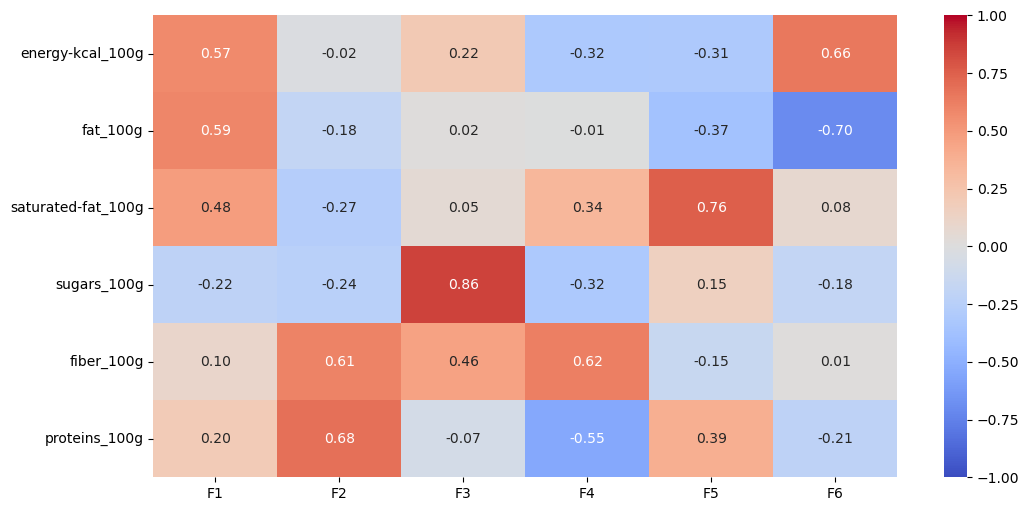

In [65]:
fig, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(pcs.T, vmin=-1, vmax=1, annot=True, cmap="coolwarm", fmt="0.2f")

In [66]:
def correlation_graph(pca, 
                      x_y, 
                      features) : 
    """Affiche le graphe des correlations

    Positional arguments : 
    -----------------------------------
    pca : sklearn.decomposition.PCA : notre objet PCA qui a été fit
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2
    features : list ou tuple : la liste des features (ie des dimensions) à représenter
    """

    # Extrait x et y 
    x,y=x_y

    fig, ax = plt.subplots(figsize=(10, 9))

    # Pour chaque composante : 
    for i in range(0, pca.components_.shape[1]):

        # Les flèches
        ax.arrow(0,0, 
                pca.components_[x, i],  
                pca.components_[y, i],  
                head_width=0.07,
                head_length=0.07, 
                width=0.02, )

        # Les labels
        plt.text(pca.components_[x, i] + 0.05,
                pca.components_[y, i] + 0.05,
                features[i])
        
    # Affichage des lignes horizontales et verticales
    plt.plot([-1, 1], [0, 0], color='grey', ls='--')
    plt.plot([0, 0], [-1, 1], color='grey', ls='--')

    # Nom des axes, avec le pourcentage d'inertie expliqué
    plt.xlabel('F{} ({}%)'.format(x+1, round(100*pca.explained_variance_ratio_[x],1)))
    plt.ylabel('F{} ({}%)'.format(y+1, round(100*pca.explained_variance_ratio_[y],1)))

    plt.title("Cercle des corrélations (F{} et F{})".format(x+1, y+1))

    # Le cercle 
    an = np.linspace(0, 2 * np.pi, 100)
    plt.plot(np.cos(an), np.sin(an))  # Add a unit circle for scale

    plt.axis('equal')
    plt.show(block=False)

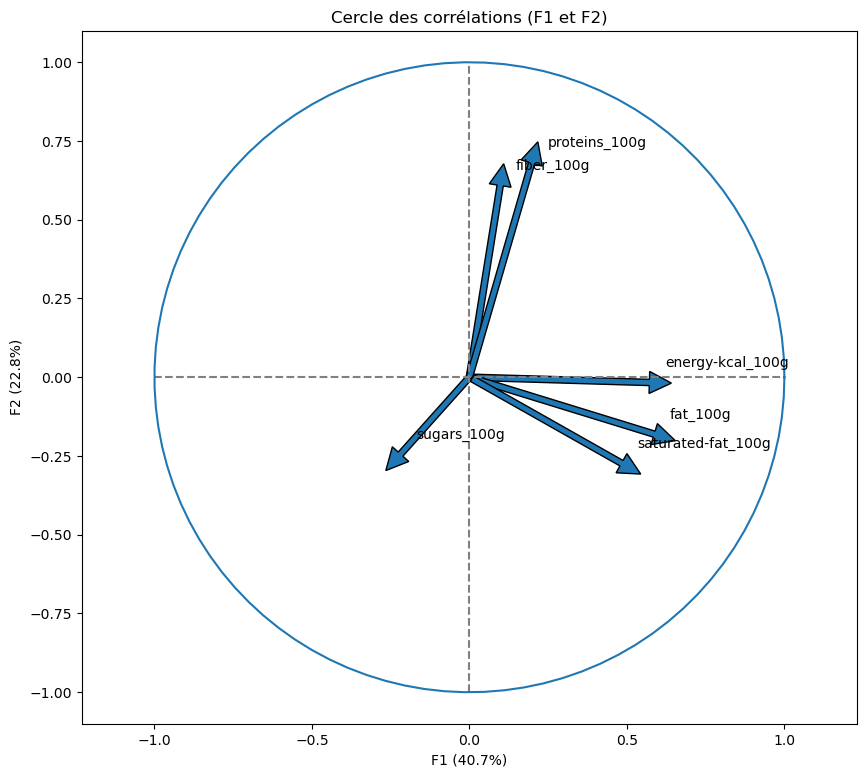

In [67]:
correlation_graph(pca, (0,1), features)

In [68]:
X_proj = pca.transform(X_scaled)
X_proj[:5]

array([[-1.20535239, -0.18223135, -0.59918921,  0.79578464, -0.06450979,
        -0.17603368],
       [-1.20843808, -0.6508718 ,  0.49088708,  0.11015642, -0.02792726,
        -0.03010399],
       [-0.41907642,  0.46468081, -0.55269627,  0.05165265,  0.1351022 ,
        -0.03040083],
       [-0.61964453,  0.18993552, -1.05456955, -0.4232564 ,  0.32242631,
        -0.08442369],
       [-0.54731818,  0.03823137, -0.49220081,  0.36539361, -0.17784025,
         0.16799363]])

In [69]:
def display_factorial_planes(   X_projected, 
                                x_y, 
                                pca=None, 
                                labels = None,
                                clusters=None, 
                                alpha=1,
                                figsize=[10,8], 
                                marker="." ):
    """
    Affiche la projection des individus

    Positional arguments : 
    -------------------------------------
    X_projected : np.array, pd.DataFrame, list of list : la matrice des points projetés
    x_y : list ou tuple : le couple x,y des plans à afficher, exemple [0,1] pour F1, F2

    Optional arguments : 
    -------------------------------------
    pca : sklearn.decomposition.PCA : un objet PCA qui a été fit, cela nous permettra d'afficher la variance de chaque composante, default = None
    labels : list ou tuple : les labels des individus à projeter, default = None
    clusters : list ou tuple : la liste des clusters auquel appartient chaque individu, default = None
    alpha : float in [0,1] : paramètre de transparence, 0=100% transparent, 1=0% transparent, default = 1
    figsize : list ou tuple : couple width, height qui définit la taille de la figure en inches, default = [10,8] 
    marker : str : le type de marker utilisé pour représenter les individus, points croix etc etc, default = "."
    """

    # Transforme X_projected en np.array
    X_ = np.array(X_projected)

    # On définit la forme de la figure si elle n'a pas été donnée
    if not figsize: 
        figsize = (7,6)

    # On gère les labels
    if  labels is None : 
        labels = []
    try : 
        len(labels)
    except Exception as e : 
        raise e

    # On vérifie la variable axis 
    if not len(x_y) ==2 : 
        raise AttributeError("2 axes sont demandées")   
    if max(x_y )>= X_.shape[1] : 
        raise AttributeError("la variable axis n'est pas bonne")   

    # on définit x et y 
    x, y = x_y

    # Initialisation de la figure       
    fig, ax = plt.subplots(1, 1, figsize=figsize)

    # On vérifie s'il y a des clusters ou non
    c = None if clusters is None else clusters
 
    # Les points    
    # plt.scatter(   X_[:, x], X_[:, y], alpha=alpha, 
    #                     c=c, cmap="Set1", marker=marker)
    sns.scatterplot(data=None, x=X_[:, x], y=X_[:, y], hue=c)

    # Si la variable pca a été fournie, on peut calculer le % de variance de chaque axe 
    if pca : 
        v1 = str(round(100*pca.explained_variance_ratio_[x]))  + " %"
        v2 = str(round(100*pca.explained_variance_ratio_[y]))  + " %"
    else : 
        v1=v2= ''

    # Nom des axes, avec le pourcentage d'inertie expliqué
    ax.set_xlabel(f'F{x+1} {v1}')
    ax.set_ylabel(f'F{y+1} {v2}')

    # Valeur x max et y max
    x_max = np.abs(X_[:, x]).max() *1.1
    y_max = np.abs(X_[:, y]).max() *1.1

    # On borne x et y 
    ax.set_xlim(left=-x_max, right=x_max)
    ax.set_ylim(bottom= -y_max, top=y_max)

    # Affichage des lignes horizontales et verticales
    plt.plot([-x_max, x_max], [0, 0], color='grey', alpha=0.8)
    plt.plot([0,0], [-y_max, y_max], color='grey', alpha=0.8)

    # Affichage des labels des points
    if len(labels) : 
        for i,(_x,_y) in enumerate(X_[:,[x,y]]):
            plt.text(_x, _y+0.05, labels[i], fontsize='14', ha='center',va='center') 

    # Titre et display
    plt.title(f"Projection des individus (sur F{x+1} et F{y+1})")
    plt.show()


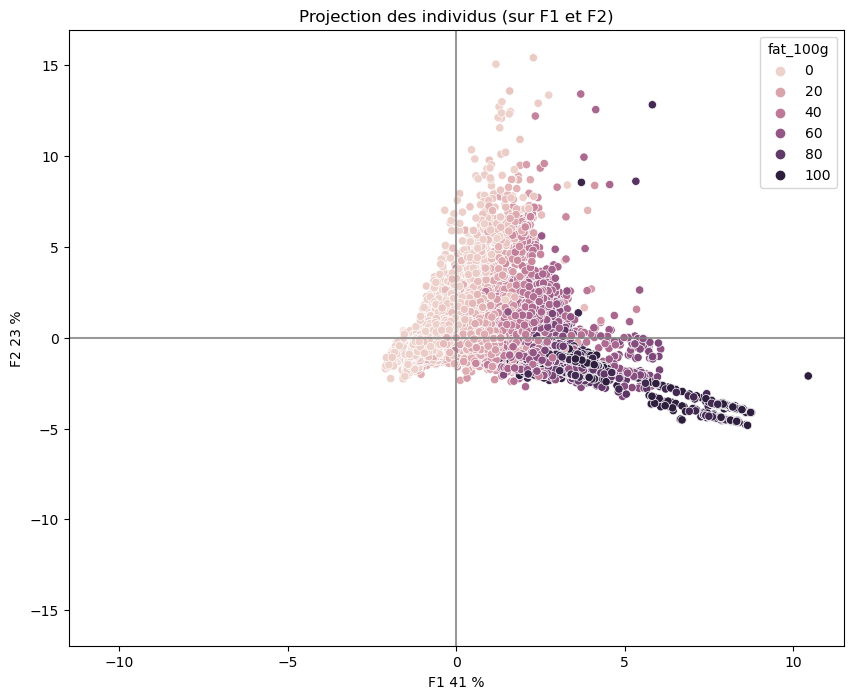

In [70]:
x_y = [0,1]
display_factorial_planes(X_proj, x_y, pca, clusters=df_acp['fat_100g'])

## 4.2 Bag of Words

In [71]:
from sklearn.cluster import AgglomerativeClustering
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.feature_extraction.text import CountVectorizer

In [72]:
rm = ["à", "de", "la", "le", "au", "du", "d'", "base", "et", "and", 'None', 'pour', 'Dès', 'mois']

regex = r'\b(?:{})\b'.format('|'.join(rm))

categories = data['categories'].dropna()
categories = pd.Series(categories.unique())
categories = categories.str.replace(',', '')
categories = categories.str.replace(regex, '', regex=True)
categories = categories.str.replace('en:', ' ')

# Trouver les valeurs de chaînes de caractères contenant un nombre
numeric_values = categories.str.contains('\d')
spec_char = categories.str.contains(r'[^\w\s]')
alphab = categories.str.contains(r'[^\x00-\x7F]+')

# Trouver les lignes contenant des valeurs numériques, caractères spéciaux ou autre alphabet
categories = categories[~numeric_values]
categories = categories[~spec_char]
categories = categories[~alphab]

categories = categories.str.split().str[:3].str.join(' ')
categories

5              Viandes Volailles Poulets
21                              Boissons
25       Additifs alimentaires Colorants
30                Poissons viandes oeufs
37           Condiments Sauces groceries
                      ...               
64024                             Devoir
64027         Condiments Non alimentaire
64028                  Non food products
64029         Condiments Non alimentaire
64033                        Chips pomme
Length: 10530, dtype: object

In [73]:

# Créer un vectorizer avec les options désirées
vectorizer = CountVectorizer(stop_words='english')

# Appliquer le vectorizer au texte et obtenir une matrice de fréquences des mots
Y = vectorizer.fit_transform(categories)

# Afficher les mots extraits du texte
features = vectorizer.get_feature_names()

# Afficher la matrice de fréquences des mots
print("La matrice de fréquences des mots est : \n", Y.toarray())

La matrice de fréquences des mots est : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\octav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [74]:
std_scale = preprocessing.StandardScaler()

std_scale.fit(Y.toarray())
Y_scaled = std_scale.transform(Y.toarray())
Y_scaled[:10]

array([[-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555],
       [-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555],
       [-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555],
       ...,
       [-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555],
       [-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555],
       [-0.01591568, -0.00974555, -0.00974555, ..., -0.00974555,
        -0.01378295, -0.00974555]])

In [75]:
Z = linkage(Y_scaled, method="ward")
Z[:10]

array([[0.0000e+00, 7.0000e+00, 0.0000e+00, 2.0000e+00],
       [1.0000e+00, 2.7000e+01, 0.0000e+00, 2.0000e+00],
       [2.0000e+00, 1.9530e+03, 0.0000e+00, 2.0000e+00],
       [3.0000e+00, 6.9400e+02, 0.0000e+00, 2.0000e+00],
       [4.0000e+00, 4.3000e+01, 0.0000e+00, 2.0000e+00],
       [5.0000e+00, 9.0000e+00, 0.0000e+00, 2.0000e+00],
       [6.0000e+00, 8.1600e+02, 0.0000e+00, 2.0000e+00],
       [4.8500e+02, 1.0530e+04, 0.0000e+00, 3.0000e+00],
       [8.0000e+00, 1.9380e+03, 0.0000e+00, 2.0000e+00],
       [5.5000e+01, 1.0535e+04, 0.0000e+00, 3.0000e+00]])

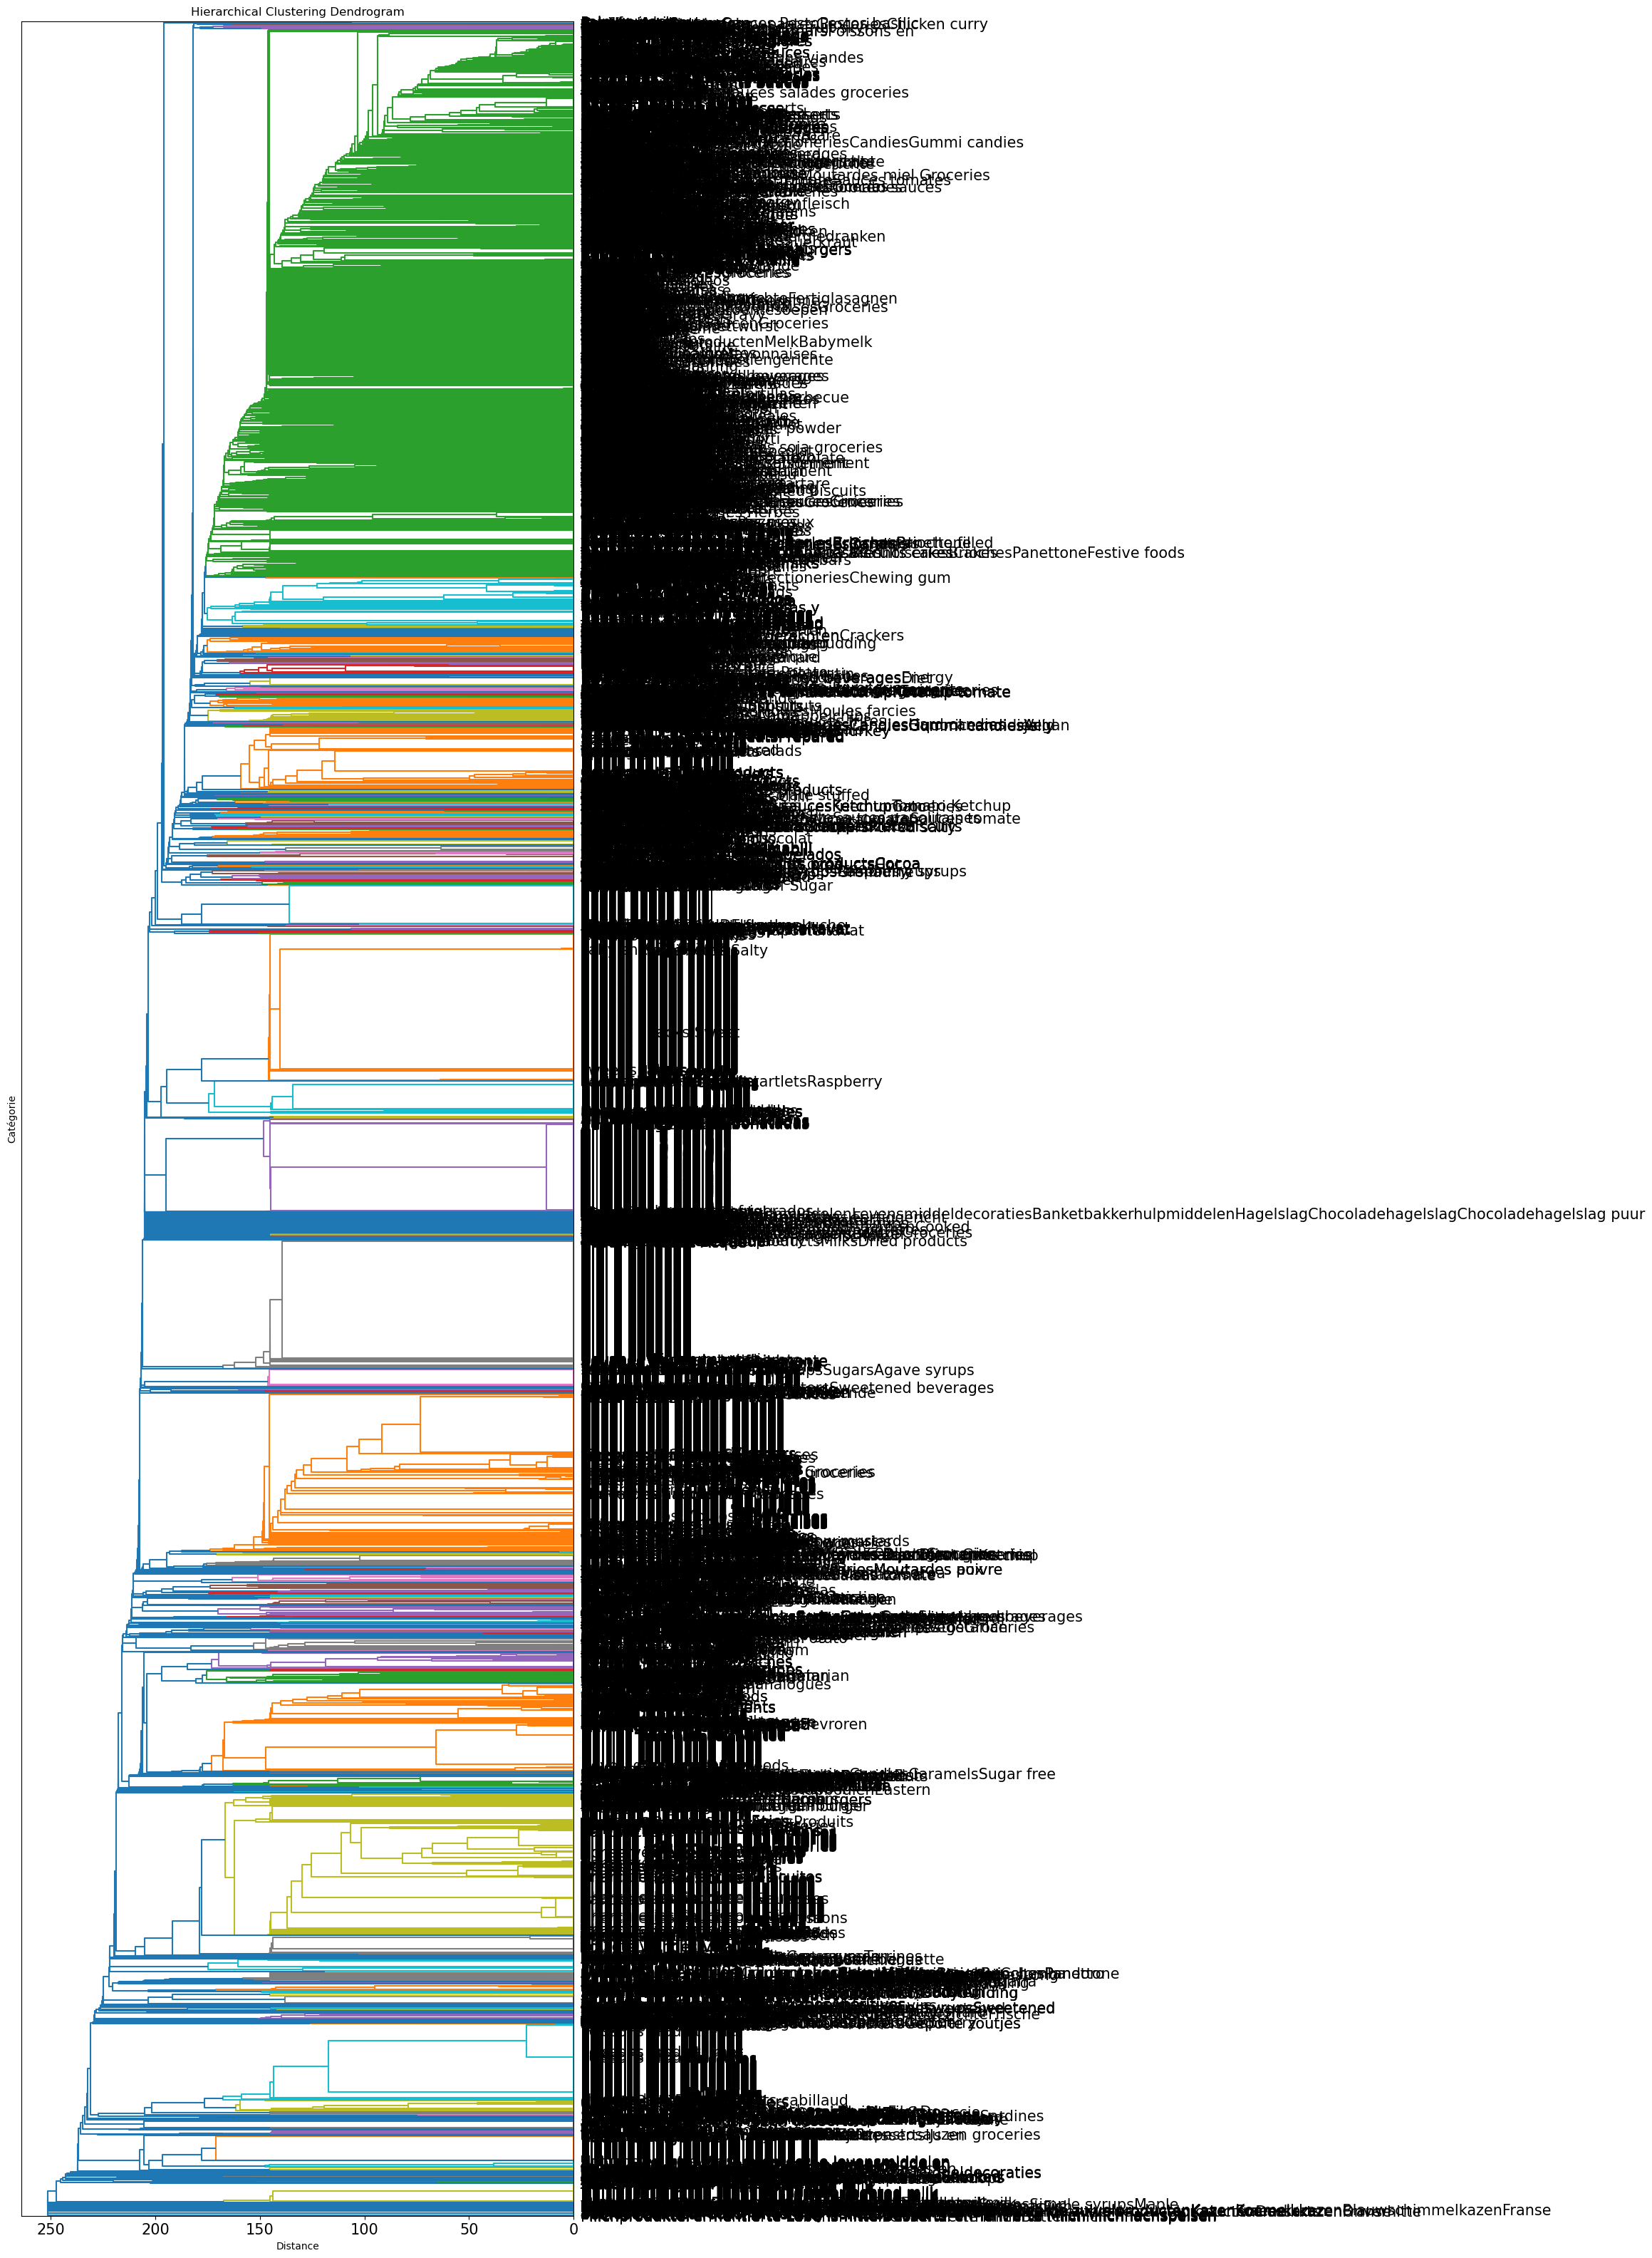

In [76]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=categories.values, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Catégorie")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

In [77]:
clusters = fcluster(Z, 800, criterion='maxclust')
clusters.shape

(10530,)

In [78]:
crosstab = pd.crosstab(data['classe'].loc[categories.index], clusters, dropna=False)
crosstab.rename_axis(columns="cluster", index="theme", inplace=True)
crosstab

crosstab.sum()
crosstab.loc[:, crosstab.sum() > 25]

cluster                   41   76   133  134  172  175  268  277  281  298  \
theme                                                                        
Boissons                    2    8   11    1    2    6   16    2   40   16   
Compléments alimentaires    0    1    1    0    1    1    2    1    6    6   
Poissons & Viandes          9   28   76    7   17    8   51    1   13   16   
Produits laitiers           1   25   19    5    8    9   23    1    9   10   
Snacks                     16   32   58   12   17   18   71   13   73   61   
Végétariens                11   21   24    1   10    9   40    8   31   22   

cluster                   304  306  316  395  478  573  
theme                                                   
Boissons                    2   22   10   10    4   44  
Compléments alimentaires    0    6    0    0    2   17  
Poissons & Viandes         11   44    3   36   13  186  
Produits laitiers           3   20    1   10    3   65  
Snacks                     16   93   20   31   11  174  
Végétariens                 5   37   11   15    4   74

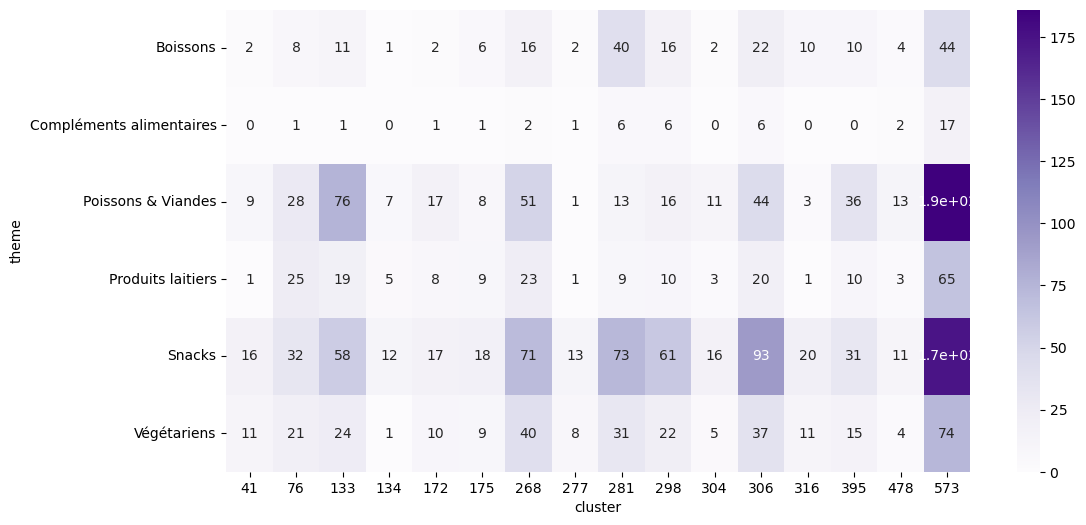

In [79]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
ax = sns.heatmap(crosstab.loc[:, crosstab.sum() > 25], annot=True, cmap="Purples")

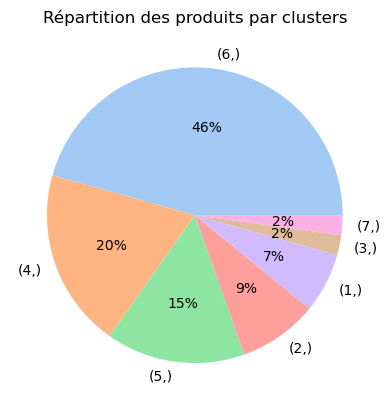

In [103]:
crosstab = pd.DataFrame(data=clusters)
colors = sns.color_palette('pastel')

plt.title('Répartition des produits par clusters')
plt.pie(crosstab.value_counts().head(10), labels=crosstab.value_counts().index[:10], colors = colors, autopct='%.0f%%')
plt.show()

##  4.3 Bag Of Words - Food Groups

In [81]:
food_groups_unique = pd.Series(data['food_groups_tags'].dropna().unique())
food_groups = food_groups_unique.str.replace(',', ' ')
food_groups = food_groups.str.replace('en:', ' ')
food_groups = food_groups.str.replace('-', ' ')

food_groups_unique

0                  en:composite-foods,en:one-dish-meals
1          en:composite-foods,en:pizza-pies-and-quiches
2                    en:fruits-and-vegetables,en:fruits
3                  en:milk-and-dairy-products,en:cheese
4                  en:fish-meat-eggs,en:meat,en:poultry
5                      en:cereals-and-potatoes,en:bread
6     en:fish-meat-eggs,en:fish-and-seafood,en:fatty...
7     en:fish-meat-eggs,en:meat,en:meat-other-than-p...
8                en:sugary-snacks,en:biscuits-and-cakes
9          en:milk-and-dairy-products,en:dairy-desserts
10                         en:beverages,en:fruit-juices
11                  en:beverages,en:sweetened-beverages
12                en:beverages,en:unsweetened-beverages
13                           en:sugary-snacks,en:sweets
14          en:salty-snacks,en:salty-and-fatty-products
15           en:fats-and-sauces,en:dressings-and-sauces
16                   en:cereals-and-potatoes,en:cereals
17                        en:salty-snacks,en:app

In [82]:
# Créer un vectorizer avec les options désirées
vectorizer = CountVectorizer(stop_words='english')

# Appliquer le vectorizer au texte et obtenir une matrice de fréquences des mots
X = vectorizer.fit_transform(food_groups)

# Afficher les mots extraits du texte
features = vectorizer.get_feature_names()

# Afficher la matrice de fréquences des mots
print("La matrice de fréquences des mots est : \n", X.toarray())

La matrice de fréquences des mots est : 
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


C:\Users\octav\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [83]:
std_scale = preprocessing.StandardScaler()

std_scale.fit(X.toarray())
X_scaled = std_scale.transform(X.toarray())
X_scaled[:10]

array([[-0.1490712 , -0.1490712 , -0.1490712 , -0.1490712 , -0.45883147,
        -0.1490712 , -0.1490712 , -0.1490712 , -0.1490712 , -0.36214298,
        -0.1490712 , -0.1490712 , -0.1490712 ,  3.7859389 , -0.1490712 ,
        -0.29012943, -0.1490712 ,  6.70820393, -0.1490712 , -0.1490712 ,
        -0.47036043, -0.20180184, -0.21320072, -0.42365927, -0.1490712 ,
         3.7859389 , -0.21320072, -0.32744619, -0.1490712 , -0.1490712 ,
        -0.1490712 , -0.1490712 , -0.1490712 ,  6.70820393, -0.43600601,
        -0.32929278, -0.1490712 , -0.1490712 , -0.1490712 , -0.1490712 ,
        -0.1490712 , -0.1490712 , -0.1490712 , -0.36639675, -0.21320072,
        -0.1490712 , -0.38729833, -0.1490712 , -0.24806947, -0.1490712 ,
        -0.20180184, -0.26413527, -0.42365927, -0.1490712 , -0.1490712 ,
        -0.3086067 , -0.21320072, -0.1490712 , -0.1490712 , -0.1490712 ,
        -0.1490712 , -0.32929278, -0.1490712 , -0.1490712 ],
       [-0.1490712 , -0.1490712 , -0.1490712 , -0.1490712 , -0.

In [84]:
Z = linkage(X_scaled, method="ward")
Z[:10]

array([[ 4.        ,  7.        ,  1.54279048,  2.        ],
       [16.        , 37.        ,  2.08232216,  2.        ],
       [ 2.        , 41.        ,  2.15178924,  2.        ],
       [42.        , 45.        ,  2.163658  ,  2.        ],
       [32.        , 47.        ,  3.02903212,  3.        ],
       [20.        , 48.        ,  3.16881539,  3.        ],
       [ 6.        , 24.        ,  5.09737025,  2.        ],
       [11.        , 33.        ,  6.85727513,  2.        ],
       [49.        , 52.        ,  7.47592249,  4.        ],
       [15.        , 18.        ,  8.13458933,  2.        ]])

In [85]:
Z.shape

(45, 4)

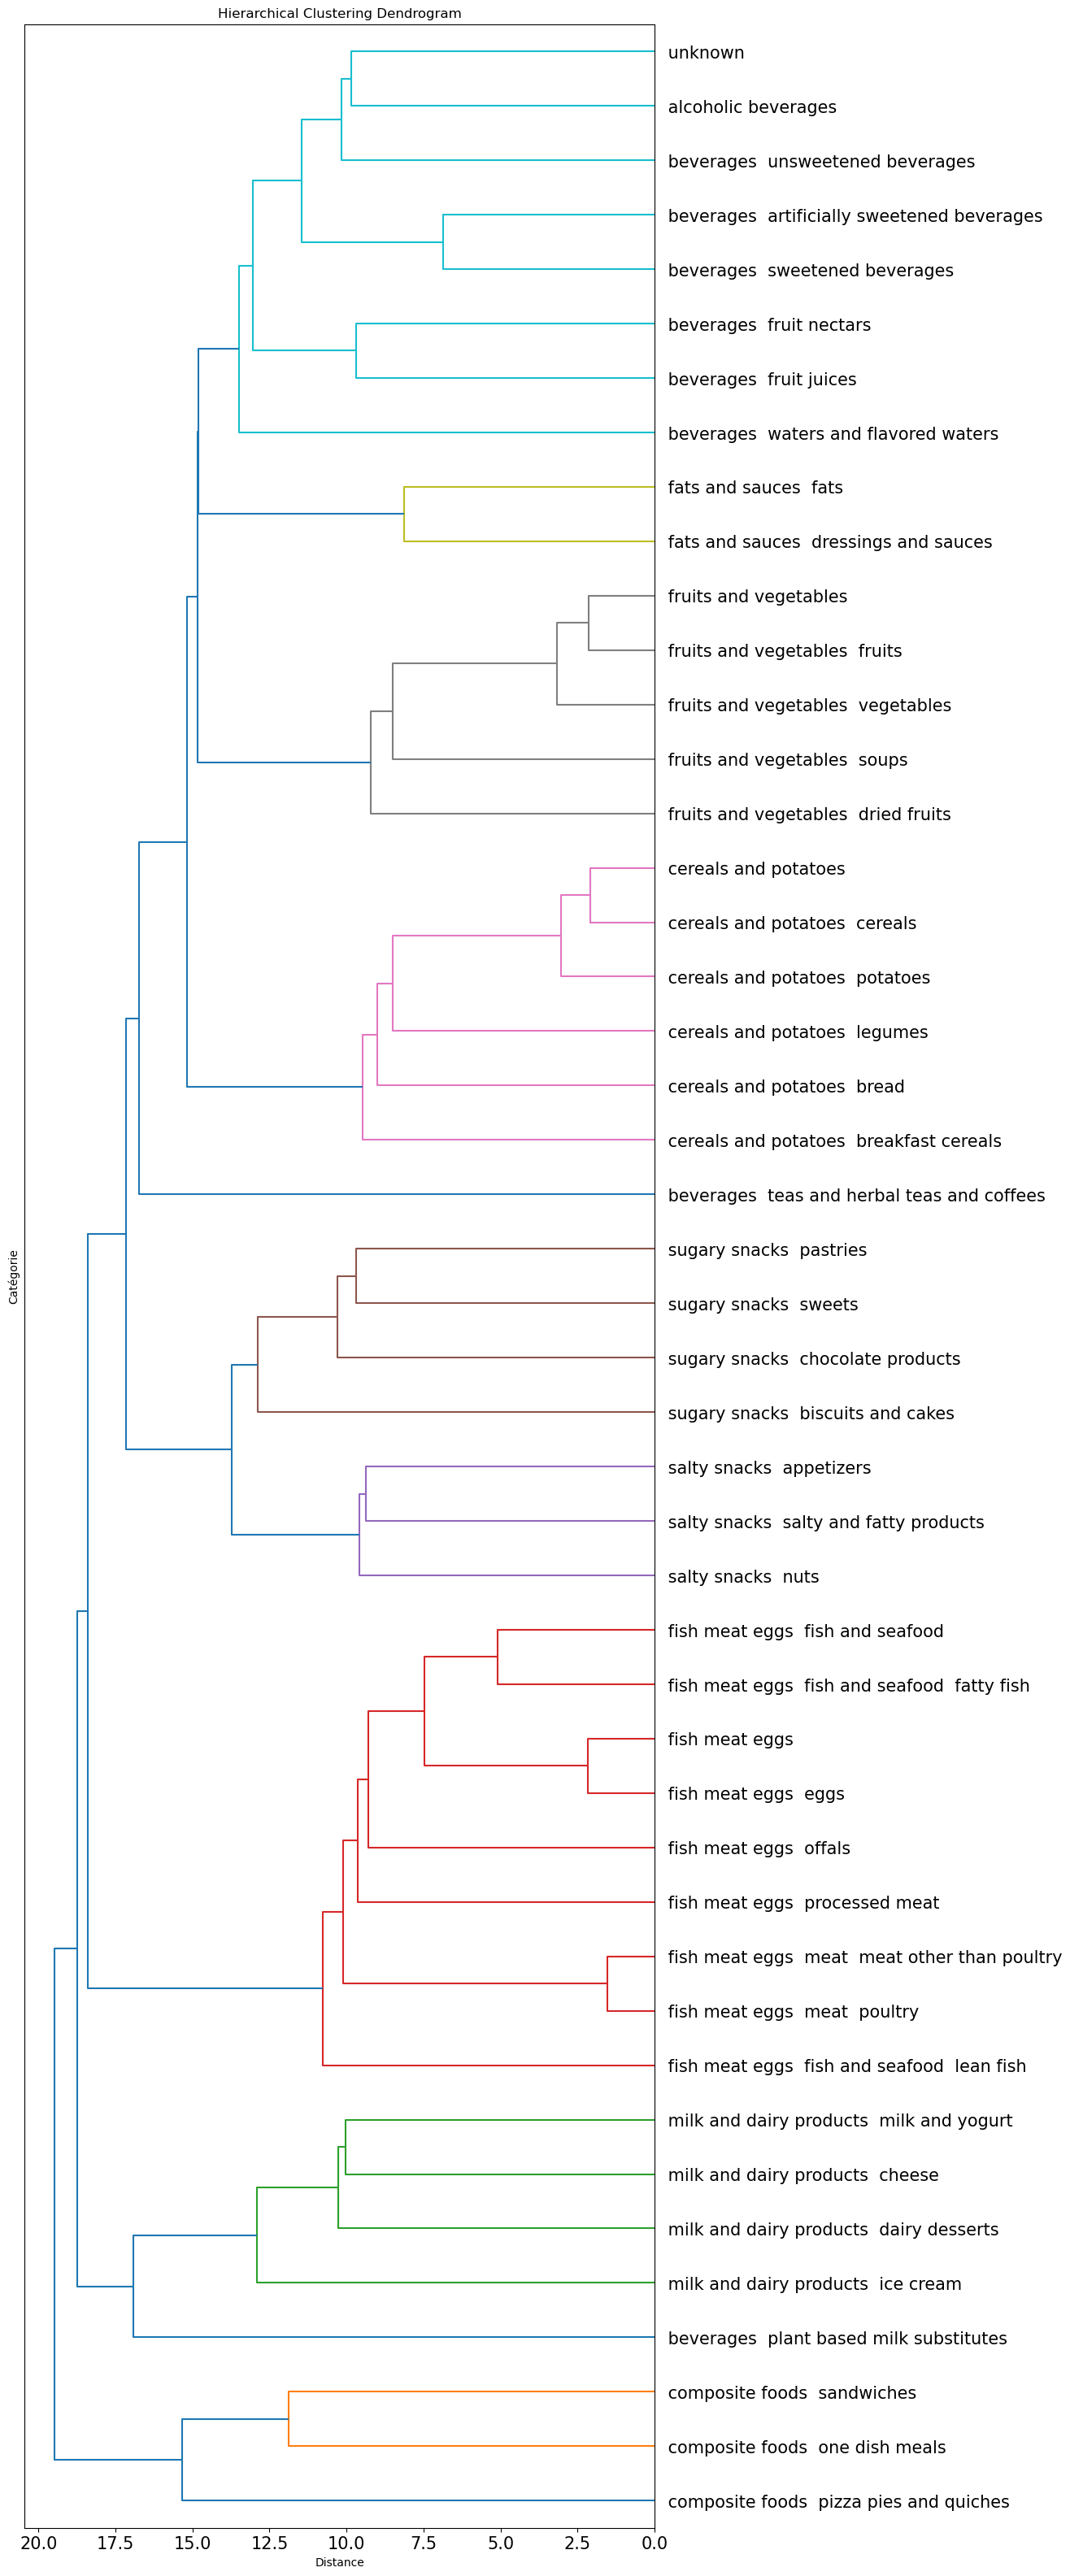

In [86]:
fig, ax = plt.subplots(1, 1, figsize=(10,40))

_ = dendrogram(Z, ax=ax, labels=food_groups.values, orientation = "left")

plt.title("Hierarchical Clustering Dendrogram")
ax.set_xlabel("Distance")
ax.set_ylabel("Catégorie")
ax.tick_params(axis='x', which='major', labelsize=15)
ax.tick_params(axis='y', which='major', labelsize=15)

In [87]:
clusters = fcluster(Z, 7, criterion='maxclust')
clusters

array([1, 1, 6, 2, 4, 6, 4, 4, 5, 2, 6, 6, 6, 5, 5, 6, 6, 5, 6, 5, 6, 6,
       6, 4, 4, 2, 4, 5, 6, 7, 1, 5, 6, 6, 3, 6, 6, 6, 2, 6, 6, 6, 4, 6,
       4, 4], dtype=int32)

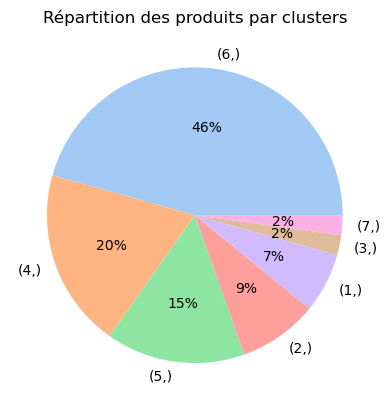

In [102]:
df = pd.DataFrame(clusters, index=food_groups_unique)

colors = sns.color_palette('pastel')

plt.title('Répartition des produits par clusters')
plt.pie(df.value_counts(), labels=df.value_counts().index, colors = colors, autopct='%.0f%%')
plt.show()

In [89]:
result = pd.merge(data, df, left_on='food_groups_tags',right_on=df.index)
result.rename(columns={0:'group'}, inplace=True)
X = "classe"
Y = "group"

result_piv = result[[X,Y]].pivot_table(index=X,columns=Y,aggfunc=len)
result_piv

group                          1        2       3        4        5        6  \
classe                                                                         
Boissons                    20.0    663.0  1403.0      6.0      5.0  23352.0   
Compléments alimentaires    13.0     10.0     NaN      6.0      2.0     55.0   
Poissons & Viandes         966.0      3.0     NaN  53223.0   6345.0    170.0   
Produits laitiers           89.0  29822.0     1.0      1.0    703.0   1455.0   
Snacks                    1109.0    533.0     2.0    168.0  57750.0   1497.0   
Végétariens               2305.0     25.0     4.0      1.0  13043.0  55213.0   

group                         7  
classe                           
Boissons                  713.0  
Compléments alimentaires    NaN  
Poissons & Viandes          NaN  
Produits laitiers           NaN  
Snacks                      NaN  
Végétariens                 NaN

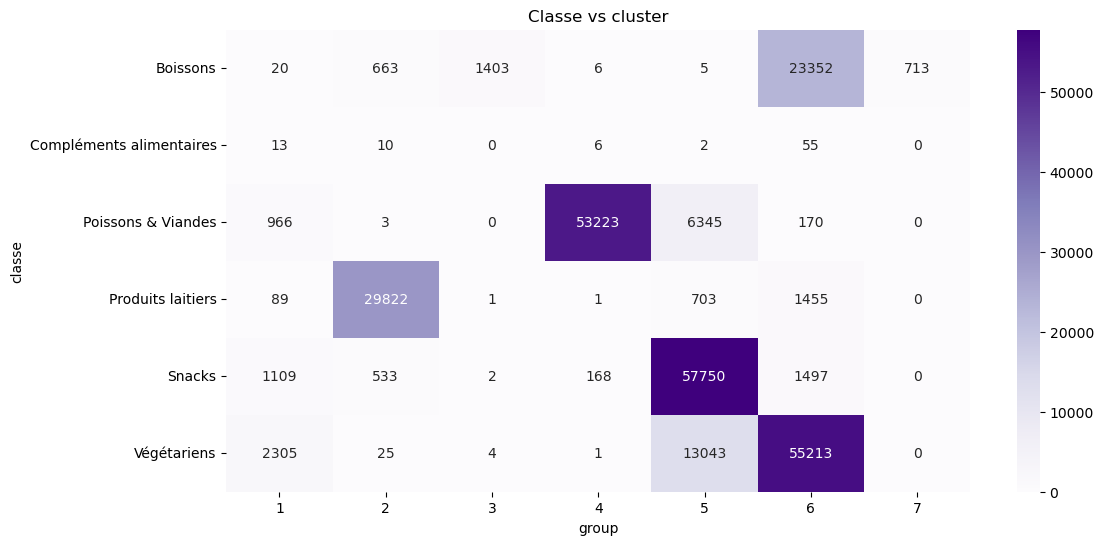

In [104]:
fig, ax = plt.subplots(1,1, figsize=(12,6))
plt.title('Classe vs cluster')
ax = sns.heatmap(result_piv.fillna(0), annot=True, cmap="Purples", fmt='.0f')

Végétarien : Groupe 6 + 5 (pour les huiles ?)  
Boisson : Groupe 6 (beaucoup sont "aliments et boissons d'origines végétales")  
Poissons & Viandes : Groupe 4 + 5  
Produits Laitiers : Groupe 2  
Snacks : Groupe 5  
Compléments : Très peu nombreux  